<a href="https://colab.research.google.com/github/Emilyjane994/Immunophenotyping-in-IBM/blob/main/Data_Exploration_and_stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Manuscript: Identification of distinct immune signatures in Inclusion Body Myositis by peripheral blood immunophenotyping using machine learning models
#Authors: Emily McLeish*, Anuradha Sooda*, Nataliya Slater, Kelly Beer, Ian Cooper, Frank. L. Mastaglia, Merrilee Needham & Jerome D. Coudert
#Date: 2023
#Last updated: 1/2/2023

#Data
Absolute counts for 21 immune cell populations
Percentages of 66 immune cell populations and categorical data in 81 inclusion body myositis (IBM) and 45 Healthy controls (HC)

*  Dependent variable is immune cell populations
*   Independent varaibles is group (IBM and HC)
*   covariates are Age and Sex

#Research question and data

is immunophenotype a predictor of IBM after correction for Age and Sex

#Hypothesis


*   Null Hypothesis
    *   immunophenotype is not a predictor of IBM after correcting for Age and Sex
*   Alternative Hypotheis
    *   Immunophenotype is a predictor of IBM after correcting for age and Sex






In [ ]:
import sys
print("Python version")
print(sys.version)


Python version
3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]


In [1]:
!pip install --upgrade adjustText


In [1]:
#load in required libries
import pandas as pd #For importing and handling tabular data
import numpy as np #For handling mathematical data in the form of numerical arrays
import re #	For performing more advanced string operations
import patsy
import plotly.graph_objects as go #	For creating interactive graphs
from plotly import express
from plotly import subplots
from plotly import io
from statsmodels.formula.api import ols
import math #	For performing math operations
import scipy.stats as stat #For performing statistical operations
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multitest import fdrcorrection
from math import log10
from scipy.stats import median_test
from scipy import stats
import warnings
from statsmodels.stats.anova import anova_lm
import textwrap
from adjustText import adjust_text

# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
%cd /content/gdrive/MyDrive/Manuscript/input/

/content/gdrive/MyDrive/Manuscript/input


#Load in absolute count data

In [5]:
absolute= pd.read_csv("absolute counts all.csv", encoding='ISO-8859-1')
absolute

,Pathology,Lymphocytes,T cells,CD4,Naive CD4,CM CD4,EM CD4,Temra CD4,CD8,Naïve CD8,...,Temra CD8,CD4.CD8,B cells,Naïve B cells,Non SM,SM,DN,TCRgd,Vd2,Vd1
0,HC,7.620000e+08,3.550000e+08,229000000.0,31100000.0,122000000.0,67200000.0,8430000.0,113000000.0,17200000.0,...,29400000.0,2.025412,125000000.0,47100000.0,11700000.0,10400000.0,56200000.0,113000000.0,41700000.0,21700000.0
1,HC,1.570000e+09,1.140000e+09,661000000.0,196000000.0,395000000.0,53700000.0,15700000.0,421000000.0,9320000.0,...,357000000.0,1.570000,91100000.0,2660000.0,1270000.0,17300000.0,69800000.0,15900000.0,8990000.0,5590000.0
2,HC,6.230000e+08,2.410000e+08,165000000.0,28700000.0,122000000.0,13300000.0,997000.0,64500000.0,1420000.0,...,31300000.0,2.560000,118000000.0,34700000.0,6680000.0,7850000.0,68300000.0,6760000.0,6210000.0,275000.0
3,HC,1.630000e+09,1.080000e+09,607000000.0,316000000.0,271000000.0,12900000.0,7120000.0,406000000.0,10200000.0,...,238000000.0,1.496470,170000000.0,56000000.0,30800000.0,31200000.0,52200000.0,13500000.0,4820000.0,6010000.0
4,HC,9.340000e+08,5.850000e+08,435000000.0,331000000.0,81200000.0,4970000.0,17900000.0,133000000.0,114000000.0,...,12800000.0,3.274406,136000000.0,29700000.0,15400000.0,17500000.0,73700000.0,113000000.0,108000000.0,38800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,IBM,1.190000e+09,8.210000e+08,490000000.0,116000000.0,206000000.0,156000000.0,11700000.0,280000000.0,26300000.0,...,106000000.0,1.750033,158000000.0,116000000.0,2560000.0,5280000.0,34200000.0,NaN,NaN,NaN
122,IBM,6.230000e+08,3.260000e+08,247000000.0,62400000.0,109000000.0,73100000.0,2350000.0,62400000.0,12600000.0,...,14200000.0,3.961101,136000000.0,30500000.0,2230000.0,20700000.0,82700000.0,NaN,NaN,NaN
123,IBM,1.030000e+09,5.510000e+08,413000000.0,201000000.0,112000000.0,91400000.0,8930000.0,119000000.0,63400000.0,...,31800000.0,3.465543,166000000.0,81900000.0,5330000.0,10000000.0,69100000.0,NaN,NaN,NaN
124,IBM,8.450000e+08,4.750000e+08,305000000.0,146000000.0,24000000.0,72700000.0,63100000.0,145000000.0,13500000.0,...,122000000.0,2.113463,64100000.0,26000000.0,1360000.0,3600000.0,33100000.0,NaN,NaN,NaN


#Perform mann-whitney Test for absolute counts

In [12]:
import pandas as pd
from scipy.stats import mannwhitneyu

# Specify the groups you want to compare
group1 = 'IBM'
group2 = 'HC'


# List of parameters to compare

parameters_to_compare = [
    'Lymphocytes ', 'T cells ', 'CD4', 'Naive CD4', 'CM CD4', "EM CD4", 'Temra CD4',
    'CD8', 'Naïve CD8', 'CM CD8', "EM CD8", 'Temra CD8', 'CD4.CD8', 'B cells', 'Naïve B cells',
    'Non SM', 'SM', 'DN', 'TCRgd', 'Vd2', 'Vd1']


# Create an empty DataFrame to store results
results_absolute = pd.DataFrame(columns=['Parameter', 'Median_Group1', 'Median_Group2', 'IQR_Group1', 'IQR_Group2', 'Min_Group1', 'Min_Group2', 'Max_Group1', 'Max_Group2', 'U_Statistic', 'P_Value'])

# Specify the groups you want to compare
group1 = 'IBM'
group2 = 'HC'

# Iterate through each parameter
for parameter in parameters_to_compare:
    #print(f"\nMann-Whitney U Test for {parameter}:")

    absolute_group1 = absolute[absolute['Pathology'] == group1][parameter]
    absolute_group2 = absolute[absolute['Pathology'] == group2][parameter]

    # Perform Mann-Whitney U test
    stat, p_value = mannwhitneyu(absolute_group1, absolute_group2)

    # Calculate median, interquartile ranges, minimum, and maximum
    median_group1 = absolute_group1.median()
    median_group2 = absolute_group2.median()
    iqr_group1 = absolute_group1.quantile(0.75) - absolute_group1.quantile(0.25)
    iqr_group2 = absolute_group2.quantile(0.75) - absolute_group2.quantile(0.25)
    min_group1 = absolute_group1.min()
    min_group2 = absolute_group2.min()
    max_group1 = absolute_group1.max()
    max_group2 = absolute_group2.max()

    # Display the results
    #print(f"Comparison between {group1} and {group2}:")
    #print(f"  Median ({group1}): {median_group1}")
    #print(f"  Median ({group2}): {median_group2}")
    #print(f"  IQR ({group1}): {iqr_group1}")
    #print(f"  IQR ({group2}): {iqr_group2}")
    #print(f"  Min ({group1}): {min_group1}")
    #print(f"  Min ({group2}): {min_group2}")
    #print(f"  Max ({group1}): {max_group1}")
    #print(f"  Max ({group2}): {max_group2}")
    #print(f"  U Statistic: {stat}")
    #print(f"  P-value: {p_value}")

    # Append results to the DataFrame
    results_absolute = results_absolute.append({
        'Parameter': parameter,
        'Median_Group1': median_group1,
        'Median_Group2': median_group2,
        'IQR_Group1': iqr_group1,
        'IQR_Group2': iqr_group2,
        'Min_Group1': min_group1,
        'Max_Group1': max_group1,
        'Min_Group2': min_group2,
        'Max_Group2': max_group2,
        'U_Statistic': stat,
        'P_Value': p_value
    }, ignore_index=True)

# Display the results DataFrame
print("\nResults Table:")
results_absolute


Results Table:


,Parameter,Median_Group1,Median_Group2,IQR_Group1,IQR_Group2,Min_Group1,Min_Group2,Max_Group1,Max_Group2,U_Statistic,P_Value
0,Lymphocytes,9.670000e+08,1.140000e+09,5.770000e+08,6.750000e+08,1.190000e+08,3.270000e+08,2.740000e+09,2.780000e+09,1447.5,5.653740e-02
1,T cells,5.190000e+08,6.280000e+08,3.570000e+08,4.020000e+08,5.030000e+07,1.870000e+08,1.870000e+09,1.670000e+09,1398.5,3.106459e-02
2,CD4,3.030000e+08,4.120000e+08,2.380000e+08,2.780000e+08,2.500000e+07,1.110000e+08,1.020000e+09,9.360000e+08,1307.5,8.803879e-03
3,Naive CD4,7.540000e+07,1.170000e+08,1.120000e+08,1.067000e+08,3.010000e+06,1.250000e+07,6.090000e+08,4.910000e+08,1495.0,9.592903e-02
4,CM CD4,8.240000e+07,1.360000e+08,9.010000e+07,1.254000e+08,2.780000e+06,3.180000e+07,4.520000e+08,5.290000e+08,1169.0,8.848666e-04
5,EM CD4,7.940000e+07,1.040000e+08,6.760000e+07,6.070000e+07,8.710000e+06,4.970000e+06,2.910000e+08,4.190000e+08,1496.0,9.694126e-02
6,Temra CD4,7.270000e+06,6.030000e+06,1.211000e+07,8.690000e+06,7.300000e+05,7.370000e+05,1.270000e+08,6.860000e+07,2042.0,2.648352e-01
7,CD8,1.470000e+08,1.330000e+08,1.323000e+08,1.430000e+08,8.830000e+06,3.890000e+07,1.040000e+09,6.820000e+08,1741.5,6.819007e-01
8,Naïve CD8,1.060000e+07,1.720000e+07,1.508000e+07,2.661000e+07,2.300000e+05,5.750000e+05,9.310000e+07,1.160000e+08,1218.5,2.121200e-03
9,CM CD8,6.360000e+06,6.290000e+06,9.740000e+06,9.280000e+06,2.530000e+05,9.970000e+05,1.260000e+08,1.700000e+08,1796.0,8.946853e-01


#Load in percentage data

In [ ]:
#load in csv file
data = pd.read_csv("ML_dataset.csv")

In [ ]:
#need to convert sex column into binary classifiers
data = data.replace({
        "Sex":{"M":0, "F":1}
    })
data.head()

,ID#,Pathology,Age,Sex,cN1A status,TCRγδ,Vδ2,Vγ9+Vδ2+,Vδ2+CD27-,Vδ2+Cx3Cr1+,...,cDC,monocytes,Nkcells,Basophils,CD56-16b,CD56b,CD56dim,classical_monocytes,int_monocytes,inflam_monocytes
0,HC1,HC,68,0,Healthy,5.07,8.99,88.2,41.7,23.70,...,0.0346,1.7690,0.2684,0.0729,48.0332,5.5944,46.3724,93.5473,3.7536,2.5068
1,HC2,HC,73,0,Healthy,3.31,4.16,82.9,84.4,19.90,...,0.1710,2.0229,0.7299,0.0586,6.3267,9.3175,83.7040,91.4568,8.0935,0.3113
2,HC3,HC,76,0,Healthy,2.29,4.90,93.3,26.3,6.11,...,0.0083,0.9251,1.3357,0.0298,4.0046,2.4337,93.3299,56.3302,37.7022,5.4843
3,HC4,HC,47,0,Healthy,4.96,52.60,66.6,35.2,40.00,...,0.0022,1.0097,1.1593,0.0152,81.9997,0.9686,16.9870,82.0701,16.1163,2.5150
4,HC5,HC,49,1,Healthy,1.82,54.00,96.4,24.6,61.70,...,0.0309,1.8146,2.4483,0.0573,15.4730,3.9977,81.4437,97.3687,2.5549,0.0546


In [ ]:
data.Group=pd.Categorical(data.Pathology, ordered=True, categories=['IBM', 'HC'])

In [ ]:
import pandas as pd
from scipy.stats import mannwhitneyu

# Specify the groups you want to compare
group1 = 'IBM'
group2 = 'HC'

# Specify the columns to exclude
cols_to_exclude = ['ID#', 'Pathology','cN1A status', 'Sex']

In [ ]:
# get a list of columns
cols = data.columns.tolist()
print(cols)

['ID#', 'Pathology', 'Age', 'Sex', 'cN1A status', 'TCRγδ', 'Vδ2', 'Vγ9+Vδ2+', 'Vδ2+CD27-', 'Vδ2+Cx3Cr1+', 'Vδ2+CD57+', 'Vδ1+', 'Vγ9+Vδ1+', 'Vδ1+CD27-', 'Vδ1+Cx3Cr1+', 'Vδ1+CD57+', 'Vδ1-Vδ2-', 'CD4+', 'CD4Naive', 'CD4CM', 'CD4EM', 'CD4Temra', 'CD4+CD57+', 'CD4+KLRG1', 'CD4+CD27-', 'CD4+CD28-', 'CD4+KI67+', 'CD4+Tbet+', 'CD4+IFNγ+', 'CD4+Perf+', 'CD4+IL17A+', 'CD4+IFNγ+Perf+', 'CD8', 'CD8Naive', 'CD8CM', 'CD8EM', 'CD8Temra', 'CD8+CD57+', 'CD8+KLRG1+', 'CD8+CD27-', 'CD8+CD28-', 'CD8+KI67+', 'CD8+Tbet+', 'CD8+IFNγ+', 'CD8+Perf+', 'CD8+IL17A+', 'CD8+IFNγ+Perf+', 'Bcells', 'DN_Bcells', 'NaiveBcells', 'NonSM', 'SM', 'Treg', 'TregFoxP3+', 'TregKI67+', 'NaiveTreg', 'MemTreg', 'ActTreg', 'Neutrophils', 'NKT', 'pDC', 'cDC', 'monocytes', 'Nkcells', 'Basophils', 'CD56-16b', 'CD56b', 'CD56dim', 'classical_monocytes', 'int_monocytes', 'inflam_monocytes']


#Exploratory Analysis
step 1: look at normality to determine which test is most appropriate. To do this we use the Shapiro wilk test.

Step 2:if data is not normally distributed we use Mann-Whitney U test.

In [ ]:
from scipy.stats import shapiro


# Define the parameters you want to compare
parameters_to_compare = [
    'Age', 'TCRγδ', 'Vδ2', 'Vγ9+Vδ2+', 'Vδ2+CD27-', 'Vδ2+Cx3Cr1+', 'Vδ2+CD57+',
    'Vδ1+', 'Vγ9+Vδ1+', 'Vδ1+CD27-', 'Vδ1+Cx3Cr1+', 'Vδ1+CD57+', 'Vδ1-Vδ2-', 'CD4+',
    'CD4Naive', 'CD4CM', 'CD4EM', 'CD4Temra', 'CD4+CD57+', 'CD4+KLRG1', 'CD4+CD27-',
    'CD4+CD28-', 'CD4+KI67+', 'CD4+Tbet+', 'CD4+IFNγ+', 'CD4+Perf+', 'CD4+IL17A+',
    'CD4+IFNγ+Perf+', 'CD8', 'CD8Naive', 'CD8CM', 'CD8EM', 'CD8Temra', 'CD8+CD27-',
    'CD8+CD28-', 'CD8+KI67+', 'CD8+Tbet+', 'CD8+IFNγ+', 'CD8+Perf+', 'CD8+IL17A+',
    'CD8+IFNγ+Perf+', 'Bcells', 'DN_Bcells', 'NaiveBcells', 'NonSM', 'SM', 'Treg',
    'TregFoxP3+', 'TregKI67+', 'NaiveTreg', 'MemTreg', 'ActTreg', 'Neutrophils', 'NKT',
    'pDC', 'monocytes', 'Nkcells', 'Basophils', 'cDC', 'CD56-16b', 'CD56b', 'CD56dim',
    'classical_monocytes', 'int_monocytes', 'inflam_monocytes'
]

# Create an empty DataFrame to store results
shapiro_results_df = pd.DataFrame(columns=['Parameter', 'W statistic', 'P-value', 'Normality'])

# Iterate through each parameter
for parameter in parameters_to_compare:
    #print(f"\nShapiro-Wilk test for {parameter}:")

    # Perform Shapiro-Wilk test
    stat, p_value = shapiro(data[parameter])

    # Check for normality based on the p-value
    normality = 'Normal' if p_value >= 0.05 else 'Not Normal'

    #print(f"  W statistic: {stat}")
    #print(f"  P-value: {p_value}")
    #print(f"  Normality: {normality}")

    # Append results to the DataFrame
    shapiro_results_df = pd.concat([shapiro_results_df, pd.DataFrame([[parameter, stat, p_value, normality]], columns=shapiro_results_df.columns)], ignore_index=True)

# Display the results DataFrame
print("\nShapiro-Wilk Test Results:")
shapiro_results_df



Shapiro-Wilk Test Results:


,Parameter,W statistic,P-value,Normality
0,Age,0.972818,1.214128e-02,Not Normal
1,TCRγδ,0.740707,1.250764e-13,Not Normal
2,Vδ2,0.900404,1.173448e-07,Not Normal
3,Vγ9+Vδ2+,0.820995,4.393157e-11,Not Normal
4,Vδ2+CD27-,0.878955,1.025601e-08,Not Normal
...,...,...,...,...
60,CD56b,0.549791,5.731699e-18,Not Normal
61,CD56dim,0.929153,5.302865e-06,Not Normal
62,classical_monocytes,0.919712,1.396805e-06,Not Normal
63,int_monocytes,0.929232,5.364235e-06,Not Normal


In [ ]:
# Filter parameters that are normal
normal_parameters = shapiro_results_df[shapiro_results_df['Normality'] == 'Normal']['Parameter'].tolist()
print("\nParameters that are normal:", normal_parameters)


Parameters that are normal: ['CD4+', 'CD4CM', 'CD8EM', 'Bcells', 'Neutrophils']


In [ ]:
import pandas as pd
from scipy.stats import mannwhitneyu

# Assuming 'data' is your DataFrame with the relevant columns

# List of parameters to compare

parameters_to_compare = [
    'Age', 'TCRγδ', 'Vδ2', 'Vγ9+Vδ2+', 'Vδ2+CD27-', 'Vδ2+Cx3Cr1+', 'Vδ2+CD57+',
    'Vδ1+', 'Vγ9+Vδ1+', 'Vδ1+CD27-', 'Vδ1+Cx3Cr1+', 'Vδ1+CD57+', 'Vδ1-Vδ2-', 'CD4+',
    'CD4Naive', 'CD4CM', 'CD4EM', 'CD4Temra', 'CD4+CD57+', 'CD4+KLRG1', 'CD4+CD27-',
    'CD4+CD28-', 'CD4+KI67+', 'CD4+Tbet+', 'CD4+IFNγ+', 'CD4+Perf+', 'CD4+IL17A+',
    'CD4+IFNγ+Perf+', 'CD8', 'CD8Naive', 'CD8CM', 'CD8EM', 'CD8Temra', 'CD8+CD27-',
    'CD8+CD28-', 'CD8+KI67+', 'CD8+Tbet+', 'CD8+IFNγ+', 'CD8+Perf+', 'CD8+IL17A+',
    'CD8+IFNγ+Perf+', 'Bcells', 'DN_Bcells', 'NaiveBcells', 'NonSM', 'SM', 'Treg',
    'TregFoxP3+', 'TregKI67+', 'NaiveTreg', 'MemTreg', 'ActTreg', 'Neutrophils', 'NKT',
    'pDC', 'monocytes', 'Nkcells', 'Basophils', 'cDC', 'CD56-16b', 'CD56b', 'CD56dim',
    'classical_monocytes', 'int_monocytes', 'inflam_monocytes'
]


# Create an empty DataFrame to store results
results_df = pd.DataFrame(columns=['Parameter', 'Median_Group1', 'Median_Group2', 'IQR_Group1', 'IQR_Group2', 'Min_Group1', 'Min_Group2', 'Max_Group1', 'Max_Group2', 'U_Statistic', 'P_Value'])

# Specify the groups you want to compare
group1 = 'IBM'
group2 = 'HC'

# Iterate through each parameter
for parameter in parameters_to_compare:
    #print(f"\nMann-Whitney U Test for {parameter}:")

    data_group1 = data[data['Pathology'] == group1][parameter]
    data_group2 = data[data['Pathology'] == group2][parameter]

    # Perform Mann-Whitney U test
    stat, p_value = mannwhitneyu(data_group1, data_group2)

    # Calculate median, interquartile ranges, minimum, and maximum
    median_group1 = data_group1.median()
    median_group2 = data_group2.median()
    iqr_group1 = data_group1.quantile(0.75) - data_group1.quantile(0.25)
    iqr_group2 = data_group2.quantile(0.75) - data_group2.quantile(0.25)
    min_group1 = data_group1.min()
    min_group2 = data_group2.min()
    max_group1 = data_group1.max()
    max_group2 = data_group2.max()

    # Display the results
    #print(f"Comparison between {group1} and {group2}:")
    #print(f"  Median ({group1}): {median_group1}")
    #print(f"  Median ({group2}): {median_group2}")
    #print(f"  IQR ({group1}): {iqr_group1}")
    #print(f"  IQR ({group2}): {iqr_group2}")
    #print(f"  Min ({group1}): {min_group1}")
    #print(f"  Min ({group2}): {min_group2}")
    #print(f"  Max ({group1}): {max_group1}")
    #print(f"  Max ({group2}): {max_group2}")
    #print(f"  U Statistic: {stat}")
    #print(f"  P-value: {p_value}")

    # Append results to the DataFrame
    results_df = results_df.append({
        'Parameter': parameter,
        'Median_Group1': median_group1,
        'Median_Group2': median_group2,
        'IQR_Group1': iqr_group1,
        'IQR_Group2': iqr_group2,
        'Min_Group1': min_group1,
        'Max_Group1': max_group1,
        'Min_Group2': min_group2,
        'Max_Group2': max_group2,
        'U_Statistic': stat,
        'P_Value': p_value
    }, ignore_index=True)

# Display the results DataFrame
print("\nResults Table:")
results_df


Results Table:


,Parameter,Median_Group1,Median_Group2,IQR_Group1,IQR_Group2,Min_Group1,Min_Group2,Max_Group1,Max_Group2,U_Statistic,P_Value
0,Age,74.0000,68.0000,10.0000,14.0000,41,47,98,87,2501.0,0.000550
1,TCRγδ,2.1500,3.1200,2.6100,3.6800,0.16,0.14,15.8,24.4,1379.5,0.024259
2,Vδ2,15.4000,46.8000,48.4300,48.4000,0.0,3.2,88.0,95.3,1083.0,0.000168
3,Vγ9+Vδ2+,47.8000,90.5000,80.3100,21.6000,0.0,0.0,100.0,100.0,1172.0,0.000905
4,Vδ2+CD27-,18.4000,26.3000,39.0500,30.6500,0.0,1.59,100.0,94.8,1672.0,0.445008
...,...,...,...,...,...,...,...,...,...,...,...
60,CD56b,4.3668,3.2602,4.1236,3.4904,0.3225,0.2765,50.5164,9.3175,2346.0,0.007749
61,CD56dim,72.8075,58.0317,34.2962,40.0747,6.7416,6.0829,95.0236,94.4022,2353.0,0.006966
62,classical_monocytes,81.2958,82.6757,13.5286,15.3152,39.2668,36.4722,98.8905,97.3687,1751.0,0.717732
63,int_monocytes,13.2434,12.6209,11.7446,13.1233,1.003,2.5549,48.4982,40.554,1768.0,0.783364


In [ ]:
express.scatter(
    data,
    x='Age',
    y='CD8+CD57+',
    color='Pathology',
    trendline='ols',
    title='TCRγδ % given age in IBM vs HC',
    labels={'Age':'Age [years]',
            'TCRγδ':'TCRγδ %' }
)

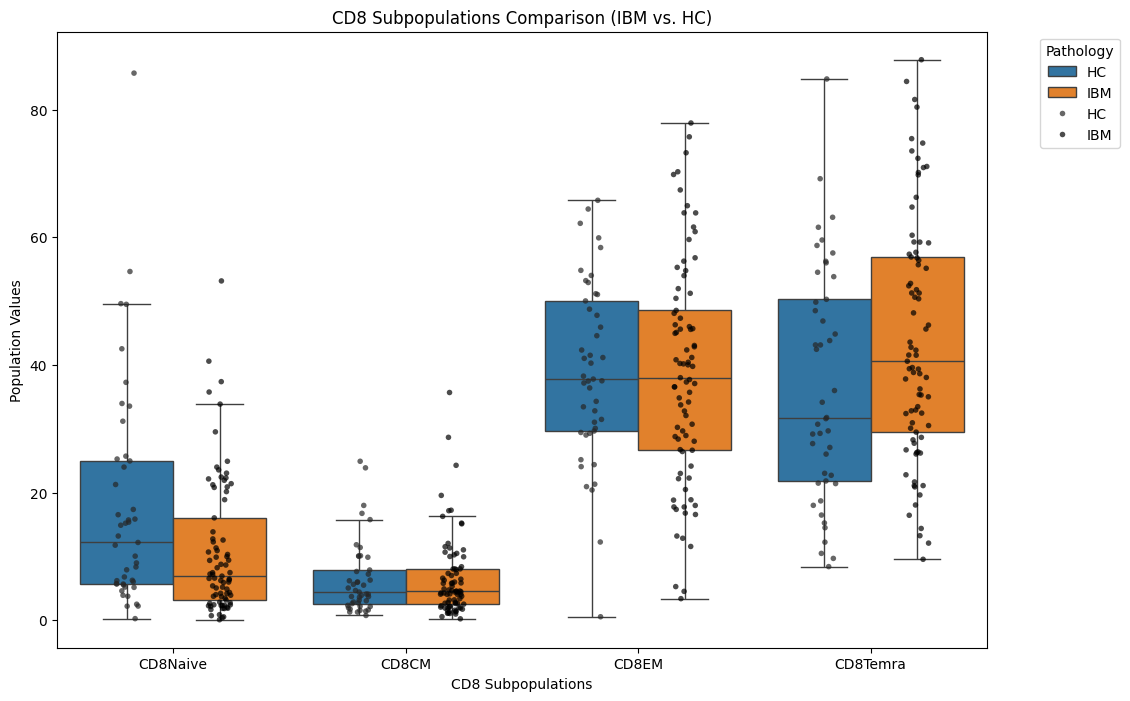

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your DataFrame, 'Pathology' is a column specifying the populations,
# and 'YourNumericColumn' is the column containing the numeric data you want to visualize.

# List of populations to compare
populations_to_compare = ['CD8Naive', 'CD8CM', 'CD8EM', 'CD8Temra']

# Melt the DataFrame to reshape it
melted_data = pd.melt(data, id_vars=['Pathology'], value_vars=populations_to_compare, var_name='Population', value_name='percentage')

# Set up the plot
plt.figure(figsize=(12, 8))

# Create a boxplot with black dots for individual data points
sns.boxplot(x='Population', y='percentage', hue='Pathology', data=melted_data, dodge=True, showfliers=False)
sns.stripplot(x='Population', y='percentage', hue='Pathology', data=melted_data, dodge=True, color='black', size=4, alpha=0.7)

# Customize the plot
plt.title('CD8 Subpopulations Comparison (IBM vs. HC)')
plt.xlabel('CD8 Subpopulations')
plt.ylabel('Population Values')

# Display legend outside the plot
plt.legend(title='Pathology', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


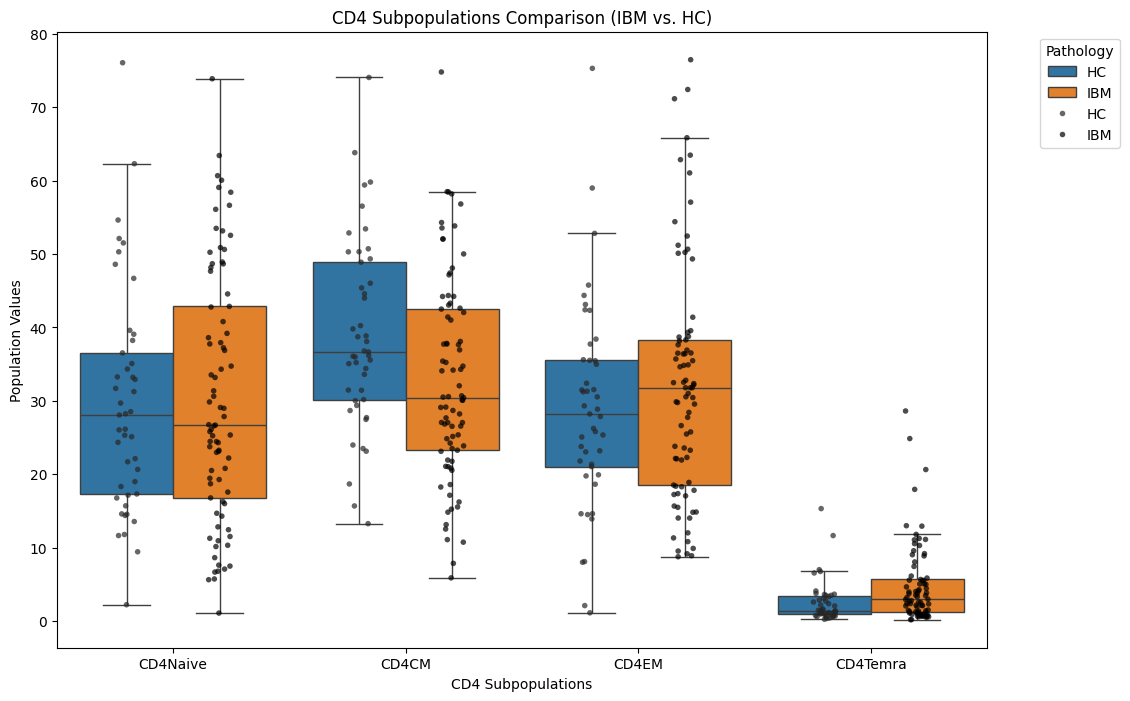

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your DataFrame, 'Pathology' is a column specifying the populations,
# and 'YourNumericColumn' is the column containing the numeric data you want to visualize.

# List of populations to compare
populations_to_compare = ['CD4Naive', 'CD4CM', 'CD4EM', 'CD4Temra']

# Melt the DataFrame to reshape it
melted_data = pd.melt(data, id_vars=['Pathology'], value_vars=populations_to_compare, var_name='Population', value_name='percentage')

# Set up the plot
plt.figure(figsize=(12, 8))

# Create a boxplot with black dots for individual data points
sns.boxplot(x='Population', y='percentage', hue='Pathology', data=melted_data, dodge=True, showfliers=False)
sns.stripplot(x='Population', y='percentage', hue='Pathology', data=melted_data, dodge=True, color='black', size=4, alpha=0.7)

# Customize the plot
plt.title('CD4 Subpopulations Comparison (IBM vs. HC)')
plt.xlabel('CD4 Subpopulations')
plt.ylabel('Population Values')

# Display legend outside the plot
plt.legend(title='Pathology', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


#**Correlation analysis**

In [ ]:
# Calculate Spearman's correlation matrix
corr_matrix = subset.corr(method='spearman')

# Display the correlation matrix
print(corr_matrix)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

subset_ibm = subset2[subset2['Pathology'] == 'IBM']

# Calculate correlation matrices for each group
ibm_corr = subset_ibm.corr(method='spearman')

plt.figure(figsize=(12, 10))
sns.heatmap(ibm_corr, cmap='coolwarm', xticklabels=subset_corr.columns, yticklabels=subset_corr.columns)
plt.xticks(rotation=90)  # Rotate x-axis tick labels if needed
plt.yticks(rotation=0)   # Rotate y-axis tick labels if needed
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

subset_HC = subset2[subset2['Pathology'] == 'HC']

# Calculate correlation matrices for each group
HC_corr = subset_HC.corr(method='spearman')

plt.figure(figsize=(12, 10))
sns.heatmap(HC_corr, cmap='coolwarm', xticklabels=subset_corr.columns, yticklabels=subset_corr.columns)
plt.xticks(rotation=90)  # Rotate x-axis tick labels if needed
plt.yticks(rotation=0)   # Rotate y-axis tick labels if needed
plt.show()

#Volcano plot for changes in immune cell populations between IBM and HC



In [ ]:
data.head()

,ID#,Pathology,Age,Sex,cN1A status,TCRγδ,Vδ2,Vγ9+Vδ2+,Vδ2+CD27-,Vδ2+Cx3Cr1+,...,cDC,monocytes,Nkcells,Basophils,CD56-16b,CD56b,CD56dim,classical_monocytes,int_monocytes,inflam_monocytes
0,HC1,HC,68,0,Healthy,5.07,8.99,88.2,41.7,23.70,...,0.0346,1.7690,0.2684,0.0729,48.0332,5.5944,46.3724,93.5473,3.7536,2.5068
1,HC2,HC,73,0,Healthy,3.31,4.16,82.9,84.4,19.90,...,0.1710,2.0229,0.7299,0.0586,6.3267,9.3175,83.7040,91.4568,8.0935,0.3113
2,HC3,HC,76,0,Healthy,2.29,4.90,93.3,26.3,6.11,...,0.0083,0.9251,1.3357,0.0298,4.0046,2.4337,93.3299,56.3302,37.7022,5.4843
3,HC4,HC,47,0,Healthy,4.96,52.60,66.6,35.2,40.00,...,0.0022,1.0097,1.1593,0.0152,81.9997,0.9686,16.9870,82.0701,16.1163,2.5150
4,HC5,HC,49,1,Healthy,1.82,54.00,96.4,24.6,61.70,...,0.0309,1.8146,2.4483,0.0573,15.4730,3.9977,81.4437,97.3687,2.5549,0.0546


In [ ]:
data = data.drop(columns=['ID#', 'cN1A status'])

In [ ]:
# Filter data for HC and IBM groups
hc_data = data[data['Pathology'] == 'HC']
ibm_data = data[data['Pathology'] == 'IBM']


In [ ]:
# get a list of columns
cols = ibm_data.columns.tolist()
print(cols)

['Pathology', 'Age', 'Sex', 'TCRγδ', 'Vδ2', 'Vγ9+Vδ2+', 'Vδ2+CD27-', 'Vδ2+Cx3Cr1+', 'Vδ2+CD57+', 'Vδ1+', 'Vγ9+Vδ1+', 'Vδ1+CD27-', 'Vδ1+Cx3Cr1+', 'Vδ1+CD57+', 'Vδ1-Vδ2-', 'CD4+', 'CD4Naive', 'CD4CM', 'CD4EM', 'CD4Temra', 'CD4+CD57+', 'CD4+KLRG1', 'CD4+CD27-', 'CD4+CD28-', 'CD4+KI67+', 'CD4+Tbet+', 'CD4+IFNγ+', 'CD4+Perf+', 'CD4+IL17A+', 'CD4+IFNγ+Perf+', 'CD8', 'CD8Naive', 'CD8CM', 'CD8EM', 'CD8Temra', 'CD8+CD57+', 'CD8+KLRG1+', 'CD8+CD27-', 'CD8+CD28-', 'CD8+KI67+', 'CD8+Tbet+', 'CD8+IFNγ+', 'CD8+Perf+', 'CD8+IL17A+', 'CD8+IFNγ+Perf+', 'Bcells', 'DN_Bcells', 'NaiveBcells', 'NonSM', 'SM', 'Treg', 'TregFoxP3+', 'TregKI67+', 'NaiveTreg', 'MemTreg', 'ActTreg', 'Neutrophils', 'NKT', 'pDC', 'cDC', 'monocytes', 'Nkcells', 'Basophils', 'CD56-16b', 'CD56b', 'CD56dim', 'classical_monocytes', 'int_monocytes', 'inflam_monocytes']


In [ ]:
# Define the cell populations
cell_populations = data.columns[2:]

In [ ]:
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U test for each variable
pvals = []
for cell_pop in cell_populations:
    u, pval = mannwhitneyu(hc_data[cell_pop], ibm_data[cell_pop])
    pvals.append(pval)


In [ ]:
print(pvals)

[0.1119756110464366, 0.024259396053538173, 0.00016816572406846354, 0.0009048061204081665, 0.44500780828797404, 0.43000315623271035, 0.3186556583620729, 0.008418085600325398, 0.038434355652643394, 0.14674727074926763, 0.0070591123510191905, 0.0005563375892083651, 0.03047493543932943, 0.3567637172936696, 0.9067784728098801, 0.008609597889682864, 0.3257814572693032, 0.005970928948449791, 0.010589864347857721, 0.8366318465755567, 0.08074817793765054, 0.0025342683653219616, 0.10325832406933541, 1.9559815404043165e-08, 0.14818650020930216, 0.9188926833614777, 0.204881273990989, 0.42704205946895524, 0.08074817793765054, 0.012070509274174163, 0.9837516214598843, 0.748392083459176, 0.05428423851603534, 2.742249286567939e-06, 0.20670181737235582, 0.001897817889308413, 9.00721432843244e-06, 0.8069297436172252, 3.789460988685371e-10, 0.001269101190000936, 6.272538557820218e-09, 0.3881379537848637, 4.546323829544853e-08, 0.001681342398320671, 0.9148523798606186, 0.6614854529453296, 0.01580710814487

In [ ]:
# Calculate log2 fold change and -log10(FDR) for each variable
log2fc = np.log2(ibm_data[cell_populations].median() / hc_data[cell_populations].median())
fdr = -np.log10(pvals)



In [ ]:
print(log2fc)
print(fdr)

In [ ]:
# Define the cutoff values for significance
fdr_cutoff = -np.log10(0.05)
log2fc_cutoff = 0.5

In [ ]:
# Define cutoff values for log2 fold change and FDR
log2fc_cutoff = 0.5
fdr_cutoff = 0.05

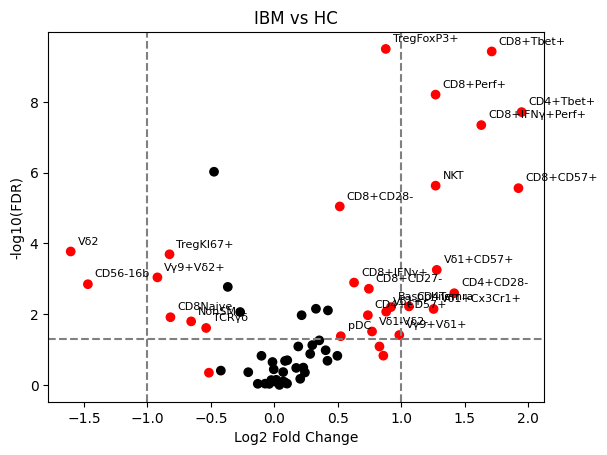

In [ ]:
# Plot volcano plot
plt.scatter(log2fc, -np.log10(pvals), c=log2fc.apply(lambda x: "red" if abs(x) >= log2fc_cutoff else "black"))
# Add vertical lines
plt.axvline(x=-1, linestyle='--', color='gray')
plt.axvline(x=1, linestyle='--', color='gray')

# Add horizontal line for FDR threshold
plt.axhline(y=-np.log10(0.05), linestyle='--', color='gray')

# Add axis labels and title
plt.xlabel('Log2 Fold Change')
plt.ylabel('-log10(FDR)')
plt.title('IBM vs HC')
# Add labels for significant genes
for i in range(len(log2fc)):
    if abs(log2fc[i]) >= log2fc_cutoff and -np.log10(pvals[i]) >= -np.log10(fdr_cutoff):
        plt.annotate(cell_populations[i], (log2fc[i], -np.log10(pvals[i])), xytext=(5, 5), textcoords='offset points', fontsize=8)

# Show the plot
plt.show()




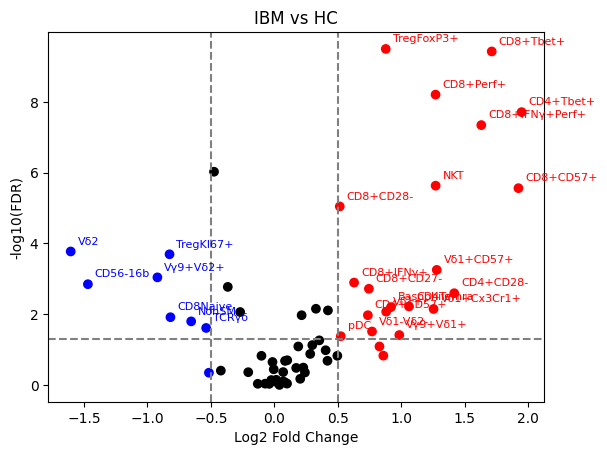

In [ ]:
neg_log10_pvals = -np.log10(pvals)
colors = log2fc.apply(lambda x: "red" if x > log2fc_cutoff else ("blue" if x < -log2fc_cutoff else "black"))
plt.scatter(log2fc, neg_log10_pvals, c=colors)

# Add vertical lines
plt.axvline(x=-log2fc_cutoff, linestyle='--', color='gray')
plt.axvline(x=log2fc_cutoff, linestyle='--', color='gray')

# Add horizontal line for FDR threshold
plt.axhline(y=-np.log10(0.05), linestyle='--', color='gray')

# Add axis labels and title
plt.xlabel('Log2 Fold Change')
plt.ylabel('-log10(FDR)')
plt.title('IBM vs HC')

# Add labels for significant genes
for i in range(len(log2fc)):
    if abs(log2fc[i]) >= log2fc_cutoff and neg_log10_pvals[i] >= -np.log10(fdr_cutoff):
        color = "red" if log2fc[i] > log2fc_cutoff else "blue"
        plt.annotate(cell_populations[i], (log2fc[i], neg_log10_pvals[i]), xytext=(5, 5), textcoords='offset points', fontsize=8, color=color)

# Show the plot
plt.show()




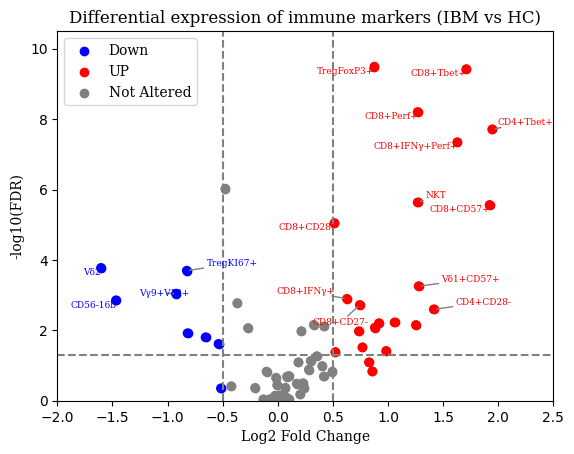

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from adjustText import adjust_text

# Define log2fc, pvals, fdr_cutoff, log2fc_cutoff, and cell_populations here

# Create three separate scatter plots with different colors and labels
plt.scatter(log2fc[log2fc < -log2fc_cutoff], neg_log10_pvals[log2fc < -log2fc_cutoff], c='blue', label='Down')
plt.scatter(log2fc[log2fc > log2fc_cutoff], neg_log10_pvals[log2fc > log2fc_cutoff], c='red', label='UP')
plt.scatter(log2fc[(log2fc >= -log2fc_cutoff) & (log2fc <= log2fc_cutoff)], neg_log10_pvals[(log2fc >= -log2fc_cutoff) & (log2fc <= log2fc_cutoff)], c='gray', label='Not Altered')

neg_log10_pvals = -np.log10(pvals)
colors = log2fc.apply(lambda x: "red" if x > log2fc_cutoff else ("blue" if x < -log2fc_cutoff else "gray"))
plt.scatter(log2fc, neg_log10_pvals, c=colors)

# Add vertical lines
plt.axvline(x=-log2fc_cutoff, linestyle='--', color='gray')
plt.axvline(x=log2fc_cutoff, linestyle='--', color='gray')

# Add horizontal line for FDR threshold
plt.axhline(y=-np.log10(0.05), linestyle='--', color='gray')

# Add axis labels and title
plt.xlabel('Log2 Fold Change', fontname='serif')
plt.ylabel('-log10(FDR)', fontname='serif')
plt.title('Differential expression of immune markers (IBM vs HC)', fontname='serif')

# Add legend to the left-hand side of the graph
plt.legend(loc='upper left', prop={'family': 'serif'})

# Set x-axis limit
plt.xlim(-2, 2.5)
plt.ylim(0, 10.5)

# Add labels for significant genes
labels = []
for i in range(len(log2fc)):
    if abs(log2fc[i]) >= 0.5 and neg_log10_pvals[i] >= 2.5:
        color = "red" if log2fc[i] > 0.5 else "blue"
        label = f"{cell_populations[i]}"
        labels.append(plt.text(log2fc[i], neg_log10_pvals[i], label, fontsize=6.5, color=color, fontname='serif'))

# Repel the labels from the dots
adjust_text(labels, arrowprops=dict(arrowstyle="-", color='gray'), force_text=(2, 2))


# Show the plot
plt.show()




##Two- Factor ANOVA for influence of M:F Sex on immune cell population in IBM vs HC

#Research question and data

is immunophenotype a predictor of IBM after correction for Sex

#Hypothesis


*   Null Hypothesis
    *   immunophenotype is not a predictor of IBM after correcting for Sex
*   Alternative Hypotheis
    *   Immunophenotype is a predictor of IBM after correcting for Sex


**Assumptions for ANOVA**

**1. Normality:** Each sample was drawn from a normally distributed population.

**2. Equal Variances:** The variances of the populations that the samples come from are equal.

**3. Independence:** The observations in each group are independent of each other and the observations within groups were obtained by a random sample.

In [ ]:
#check for normality using distribution plots and shapiro wilk-normality test

import pandas as pd
from scipy.stats import shapiro


# Assuming 'data' is your DataFrame
data.columns = data.columns.str.replace('+', 'plus').str.replace('-', 'minus')

# Specify the parameters you want to compare, the covariate, and the group variable
parameters_to_compare = [
    'TCRγδ', 'Vδ2', 'Vγ9plusVδ2plus', 'Vδ2plusCD27minus', 'Vδ2plusCx3Cr1plus', 'Vδ2plusCD57plus',
    'Vδ1plus', 'Vγ9plusVδ1plus', 'Vδ1plusCD27minus', 'Vδ1plusCx3Cr1plus', 'Vδ1plusCD57plus', 'Vδ1minusVδ2minus', 'CD4plus',
    'CD4Naive', 'CD4CM', 'CD4EM', 'CD4Temra', 'CD4plusCD57plus', 'CD4plusKLRG1', 'CD4plusCD27minus',
    'CD4plusCD28minus', 'CD4plusKI67plus', 'CD4plusTbetplus', 'CD4plusIFNγplus', 'CD4plusPerfplus', 'CD4plusIL17Aplus',
    'CD4plusIFNγplusPerfplus', 'CD8', 'CD8Naive', 'CD8CM', 'CD8EM', 'CD8Temra', 'CD8plusCD27minus',
    'CD8plusCD28minus', 'CD8plusKI67plus', 'CD8plusTbetplus', 'CD8plusIFNγplus', 'CD8plusPerfplus', 'CD8plusIL17Aplus',
    'CD8plusIFNγplusPerfplus', 'Bcells', 'DN_Bcells', 'NaiveBcells', 'NonSM', 'SM', 'Treg',
    'TregFoxP3plus', 'TregKI67plus', 'NaiveTreg', 'MemTreg', 'ActTreg', 'Neutrophils', 'NKT',
    'pDC', 'monocytes', 'Nkcells', 'Basophils', 'cDC', 'CD56minus16b', 'CD56b', 'CD56dim',
    'classical_monocytes', 'int_monocytes', 'inflam_monocytes']


# Create an empty DataFrame to store results
shapiro_results = pd.DataFrame(columns=['Parameter', 'W statistic', 'P-value', 'Normality'])

# Iterate through each parameter
for parameter in parameters_to_compare:
    #print(f"\nShapiro-Wilk test for {parameter}:")

    # Perform Shapiro-Wilk test
    stat, p_value = shapiro(data[parameter])

    # Check for normality based on the p-value
    normality = 'Normal' if p_value >= 0.05 else 'Not Normal'

    #print(f"  W statistic: {stat}")
    #print(f"  P-value: {p_value}")
    #print(f"  Normality: {normality}")

    # Append results to the DataFrame
    shapiro_results = pd.concat([shapiro_results, pd.DataFrame([[parameter, stat, p_value, normality]], columns=shapiro_results.columns)], ignore_index=True)

# Display the results DataFrame
print("\nShapiro-Wilk Test Results:")
shapiro_results

# Save the results to a CSV file
shapiro_results.to_csv('shapiro_wilk_results.csv', index=False)

# Display the results DataFrame
print("\nShapiro-Wilk Test Results:")
print(shapiro_results)





Shapiro-Wilk Test Results:

Shapiro-Wilk Test Results:
              Parameter  W statistic       P-value   Normality
0                 TCRγδ     0.740707  1.250764e-13  Not Normal
1                   Vδ2     0.900404  1.173448e-07  Not Normal
2        Vγ9plusVδ2plus     0.820995  4.393157e-11  Not Normal
3      Vδ2plusCD27minus     0.878955  1.025601e-08  Not Normal
4     Vδ2plusCx3Cr1plus     0.945908  7.284420e-05  Not Normal
..                  ...          ...           ...         ...
59                CD56b     0.549791  5.731699e-18  Not Normal
60              CD56dim     0.929153  5.302865e-06  Not Normal
61  classical_monocytes     0.919712  1.396805e-06  Not Normal
62        int_monocytes     0.929232  5.364235e-06  Not Normal
63     inflam_monocytes     0.745159  1.670090e-13  Not Normal

[64 rows x 4 columns]


In [ ]:
# Create a list of populations that passed the Shapiro-Wilk test for normality
passed_normality = shapiro_results[shapiro_results['Normality'] == 'Normal']['Parameter'].tolist()

# Display the list of populations that passed the test
print("Populations that passed the Shapiro-Wilk test for normality:")
print(passed_normality)


Populations that passed the Shapiro-Wilk test for normality:
['CD4plus', 'CD4CM', 'CD8EM', 'Bcells', 'Neutrophils']


In [ ]:
data

,ID#,Pathology,Age,Sex,cN1A status,TCRγδ,Vδ2,Vγ9plusVδ2plus,Vδ2plusCD27minus,Vδ2plusCx3Cr1plus,...,cDC,monocytes,Nkcells,Basophils,CD56minus16b,CD56b,CD56dim,classical_monocytes,int_monocytes,inflam_monocytes
0,HC1,HC,68,0,Healthy,5.07,8.99,88.20,41.70,23.70,...,0.0346,1.7690,0.2684,0.0729,48.0332,5.5944,46.3724,93.5473,3.7536,2.5068
1,HC2,HC,73,0,Healthy,3.31,4.16,82.90,84.40,19.90,...,0.1710,2.0229,0.7299,0.0586,6.3267,9.3175,83.7040,91.4568,8.0935,0.3113
2,HC3,HC,76,0,Healthy,2.29,4.90,93.30,26.30,6.11,...,0.0083,0.9251,1.3357,0.0298,4.0046,2.4337,93.3299,56.3302,37.7022,5.4843
3,HC4,HC,47,0,Healthy,4.96,52.60,66.60,35.20,40.00,...,0.0022,1.0097,1.1593,0.0152,81.9997,0.9686,16.9870,82.0701,16.1163,2.5150
4,HC5,HC,49,1,Healthy,1.82,54.00,96.40,24.60,61.70,...,0.0309,1.8146,2.4483,0.0573,15.4730,3.9977,81.4437,97.3687,2.5549,0.0546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,IBM77,IBM,72,1,SEROPOSITIVE,3.34,6.55,72.10,10.20,34.00,...,0.1488,1.7448,1.7820,0.1623,2.5915,7.7920,89.9142,66.7982,12.8577,2.9328
122,IBM78,IBM,58,1,SERONEGATIVE,2.17,53.80,82.00,6.90,24.40,...,0.1054,2.0721,2.3615,0.1178,38.5982,2.3457,58.2457,81.9188,21.0143,3.5807
123,IBM79,IBM,61,0,SERONEGATIVE,2.13,44.63,33.95,36.73,53.40,...,0.0948,3.2879,2.2468,0.1743,47.2187,2.6946,48.5833,89.6012,15.0071,2.8212
124,IBM80,IBM,73,0,SERONEGATIVE,15.80,1.45,100.00,12.20,59.50,...,0.0346,1.9302,2.3196,0.1869,10.4793,2.7155,87.0092,86.8433,13.3292,6.2510


In [ ]:
   # Assuming 'data' is your DataFrame
data.columns = data.columns.str.replace('+', 'plus').str.replace('-', 'minus')

# Specify the parameters you want to compare, the covariate, and the group variable
parameters_to_check = [
    'TCRγδ', 'Vδ2', 'Vγ9plusVδ2plus', 'Vδ2plusCD27minus', 'Vδ2plusCx3Cr1plus', 'Vδ2plusCD57plus',
    'Vδ1plus', 'Vγ9plusVδ1plus', 'Vδ1plusCD27minus', 'Vδ1plusCx3Cr1plus', 'Vδ1plusCD57plus', 'Vδ1minusVδ2minus', 'CD4plus',
    'CD4Naive', 'CD4CM', 'CD4EM', 'CD4Temra', 'CD4plusCD57plus', 'CD4plusKLRG1', 'CD4plusCD27minus',
    'CD4plusCD28minus', 'CD4plusKI67plus', 'CD4plusTbetplus', 'CD4plusIFNγplus', 'CD4plusPerfplus', 'CD4plusIL17Aplus',
    'CD4plusIFNγplusPerfplus', 'CD8', 'CD8Naive', 'CD8CM', 'CD8EM', 'CD8Temra', 'CD8plusCD27minus',
    'CD8plusCD28minus', 'CD8plusKI67plus', 'CD8plusTbetplus', 'CD8plusIFNγplus', 'CD8plusPerfplus', 'CD8plusIL17Aplus',
    'CD8plusIFNγplusPerfplus', 'Bcells', 'DN_Bcells', 'NaiveBcells', 'NonSM', 'SM', 'Treg',
    'TregFoxP3plus', 'TregKI67plus', 'NaiveTreg', 'MemTreg', 'ActTreg', 'Neutrophils', 'NKT',
    'pDC', 'monocytes', 'Nkcells', 'Basophils', 'cDC', 'CD56minus16b', 'CD56b', 'CD56dim',
    'classical_monocytes', 'int_monocytes', 'inflam_monocytes']


z_score_threshold = 2

# Create a new DataFrame to store imputed values
data_no_outliers = data.copy()

# Iterate through each parameter
for parameter in parameters_to_check:
    # Calculate z-scores
    z_scores = zscore(data[parameter])

    # Remove outliers
    data_no_outliers = data_no_outliers.loc[abs(z_scores) <= z_score_threshold]

# Create a new DataFrame for log-transformed data
data_transformed = data_no_outliers.copy()

# Add log-transformed columns to the new DataFrame
for parameter in parameters_to_check:
    data_transformed[f'log_{parameter}'] = np.log1p(data_no_outliers[parameter])

# Check for Normality Using Distribution Plots and Shapiro-Wilk Test
shapiro_results = pd.DataFrame(columns=['Parameter', 'W statistic', 'P-value', 'Normality'])

for parameter in parameters_to_check:
    # Plot distribution plots for original and log-transformed data
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(data_no_outliers[parameter], kde=True)
    plt.title(f'Distribution Plot - {parameter}')

    plt.subplot(1, 2, 2)
    sns.histplot(data_transformed[f'log_{parameter}'], kde=True)
    plt.title(f'Log-Transformed Distribution Plot - log_{parameter}')

    plt.tight_layout()
    plt.show()

    # Perform Shapiro-Wilk test on both original and log-transformed data
    # Original data
    stat, p_value = shapiro(data_no_outliers[parameter])
    normality = 'Normal' if p_value >= 0.05 else 'Not Normal'
    shapiro_results = pd.concat([shapiro_results, pd.DataFrame([[parameter, stat, p_value, normality]], columns=shapiro_results.columns)], ignore_index=True)

    # Log-transformed data
    log_stat, log_p_value = shapiro(data_transformed[f'log_{parameter}'])
    log_normality = 'Normal' if log_p_value >= 0.05 else 'Not Normal'
    shapiro_results = pd.concat([shapiro_results, pd.DataFrame([[f'log_{parameter}', log_stat, log_p_value, log_normality]], columns=shapiro_results.columns)], ignore_index=True)

# Display the results DataFrame
print("\nShapiro-Wilk Test Results:")
print(shapiro_results)

# Save the results to a CSV file
shapiro_results.to_csv('shapiro_wilk_results.csv', index=False)

In [ ]:
   # Assuming 'data' is your DataFrame
data.columns = data.columns.str.replace('+', 'plus').str.replace('-', 'minus')

# Specify the parameters you want to compare, the covariate, and the group variable
parameters_to_check = [
    'TCRγδ', 'Vδ2', 'Vγ9plusVδ2plus', 'Vδ2plusCD27minus', 'Vδ2plusCx3Cr1plus', 'Vδ2plusCD57plus',
    'Vδ1plus', 'Vγ9plusVδ1plus', 'Vδ1plusCD27minus', 'Vδ1plusCx3Cr1plus', 'Vδ1plusCD57plus', 'Vδ1minusVδ2minus', 'CD4plus',
    'CD4Naive', 'CD4CM', 'CD4EM', 'CD4Temra', 'CD4plusCD57plus', 'CD4plusKLRG1', 'CD4plusCD27minus',
    'CD4plusCD28minus', 'CD4plusKI67plus', 'CD4plusTbetplus', 'CD4plusIFNγplus', 'CD4plusPerfplus', 'CD4plusIL17Aplus',
    'CD4plusIFNγplusPerfplus', 'CD8', 'CD8Naive', 'CD8CM', 'CD8EM', 'CD8Temra', 'CD8plusCD27minus',
    'CD8plusCD28minus', 'CD8plusKI67plus', 'CD8plusTbetplus', 'CD8plusIFNγplus', 'CD8plusPerfplus', 'CD8plusIL17Aplus',
    'CD8plusIFNγplusPerfplus', 'Bcells', 'DN_Bcells', 'NaiveBcells', 'NonSM', 'SM', 'Treg',
    'TregFoxP3plus', 'TregKI67plus', 'NaiveTreg', 'MemTreg', 'ActTreg', 'Neutrophils', 'NKT',
    'pDC', 'monocytes', 'Nkcells', 'Basophils', 'cDC', 'CD56minus16b', 'CD56b', 'CD56dim',
    'classical_monocytes', 'int_monocytes', 'inflam_monocytes']


z_score_threshold = 2

# Create a new DataFrame to store imputed values
data_no_outliers = data

# Iterate through each parameter
for parameter in parameters_to_check:
    # Calculate z-scores
    z_scores = zscore(data[parameter])

    # Remove outliers
    data_no_outliers = data_no_outliers.loc[abs(z_scores) <= z_score_threshold]

# Create a new DataFrame for log-transformed data
data_transformed = data_no_outliers

# Add log-transformed columns to the new DataFrame
for parameter in parameters_to_check:
    data_transformed[f'log_{parameter}'] = np.log1p(data_no_outliers[parameter])

# Check for Normality Using Distribution Plots and Shapiro-Wilk Test
shapiro_results = pd.DataFrame(columns=['Parameter', 'W statistic', 'P-value', 'Normality'])

for parameter in parameters_to_check:
    # Plot distribution plots for original and log-transformed data
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(data_no_outliers[parameter], kde=True)
    plt.title(f'Distribution Plot - {parameter}')

    plt.subplot(1, 2, 2)
    sns.histplot(data_transformed[f'log_{parameter}'], kde=True)
    plt.title(f'Log-Transformed Distribution Plot - log_{parameter}')

    plt.tight_layout()
    plt.show()

    # Log-transformed data
    log_stat, log_p_value = shapiro(data_transformed[f'log_{parameter}'])
    log_normality = 'Normal' if log_p_value >= 0.05 else 'Not Normal'
    shapiro_results = pd.concat([shapiro_results, pd.DataFrame([[f'log_{parameter}', log_stat, log_p_value, log_normality]], columns=shapiro_results.columns)], ignore_index=True)

# Display the results DataFrame
print("\nShapiro-Wilk Test Results:")
print(shapiro_results)

# Save the results to a CSV file
shapiro_results.to_csv('shapiro_wilk_results.csv', index=False)

In [ ]:
# Create a list of populations that passed the Shapiro-Wilk test for normality
passed_normality = shapiro_results[shapiro_results['Normality'] == 'Normal']['Parameter'].tolist()

# Display the list of populations that passed the test
print("Populations that passed the Shapiro-Wilk test for normality:")
print(passed_normality)


Populations that passed the Shapiro-Wilk test for normality:
['TCRγδ', 'log_TCRγδ', 'Vδ2plusCD27minus', 'Vδ2plusCx3Cr1plus', 'log_Vδ2plusCx3Cr1plus', 'log_Vδ1plus', 'log_Vγ9plusVδ1plus', 'log_Vδ1plusCD57plus', 'log_Vδ1minusVδ2minus', 'CD4plus', 'log_CD4plus', 'CD4Naive', 'log_CD4Naive', 'CD4CM', 'log_CD4CM', 'CD4EM', 'log_CD4EM', 'CD4plusKLRG1', 'log_CD4plusKLRG1', 'log_CD4plusCD27minus', 'log_CD4plusCD28minus', 'CD4plusKI67plus', 'log_CD4plusTbetplus', 'log_CD4plusIFNγplus', 'log_CD4plusPerfplus', 'CD8', 'log_CD8', 'CD8Naive', 'log_CD8CM', 'CD8EM', 'log_CD8EM', 'CD8Temra', 'log_CD8Temra', 'CD8plusCD27minus', 'log_CD8plusCD27minus', 'CD8plusCD28minus', 'CD8plusKI67plus', 'log_CD8plusKI67plus', 'CD8plusTbetplus', 'log_CD8plusTbetplus', 'CD8plusPerfplus', 'log_CD8plusIFNγplusPerfplus', 'Bcells', 'DN_Bcells', 'log_DN_Bcells', 'log_NonSM', 'SM', 'log_SM', 'log_Treg', 'TregFoxP3plus', 'log_TregFoxP3plus', 'TregKI67plus', 'MemTreg', 'log_MemTreg', 'ActTreg', 'log_ActTreg', 'Neutrophils', 'lo

our assumption of Normality is violated- we could transform the data to achieve normality or startify IBM and HC according to sex, then perform non-paramteric Kruskal-wallis Test with Dunn's post-hoc comparison.

In [ ]:
! pip install scikit-posthocs


In [ ]:
import pandas as pd
from scipy.stats import kruskal
from scikit_posthocs import posthoc_dunn

# Assuming 'data' is your DataFrame, 'Pathology' is a column specifying IBM or HC,
# 'Sex' is the column specifying male (0) or female (1),
# and 'YourNumericColumn' is the column containing the immune cell population data.

# List of populations to compare
parameters_to_compare = [
    'Age', 'TCRγδ', 'Vδ2', 'Vγ9+Vδ2+', 'Vδ2+CD27-', 'Vδ2+Cx3Cr1+', 'Vδ2+CD57+',
    'Vδ1+', 'Vγ9+Vδ1+', 'Vδ1+CD27-', 'Vδ1+Cx3Cr1+', 'Vδ1+CD57+', 'Vδ1-Vδ2-', 'CD4+',
    'CD4Naive', 'CD4CM', 'CD4EM', 'CD4Temra', 'CD4+CD57+', 'CD4+KLRG1', 'CD4+CD27-',
    'CD4+CD28-', 'CD4+KI67+', 'CD4+Tbet+', 'CD4+IFNγ+', 'CD4+Perf+', 'CD4+IL17A+',
    'CD4+IFNγ+Perf+', 'CD8', 'CD8Naive', 'CD8CM', 'CD8EM', 'CD8Temra', 'CD8+CD27-',
    'CD8+CD28-', 'CD8+KI67+', 'CD8+Tbet+', 'CD8+IFNγ+', 'CD8+Perf+', 'CD8+IL17A+',
    'CD8+IFNγ+Perf+', 'Bcells', 'DN_Bcells', 'NaiveBcells', 'NonSM', 'SM', 'Treg',
    'TregFoxP3+', 'TregKI67+', 'NaiveTreg', 'MemTreg', 'ActTreg', 'Neutrophils', 'NKT',
    'pDC', 'monocytes', 'Nkcells', 'Basophils', 'cDC', 'CD56-16b', 'CD56b', 'CD56dim',
    'classical_monocytes', 'int_monocytes', 'inflam_monocytes']
# Create a dictionary to store the results
results = {}

# Iterate through populations and perform Kruskal-Wallis test for each parameter
for parameter in parameters_to_compare:
    # Extract data for each group
    male_hc_data = data[(data['Pathology'] == 'HC') & (data['Sex'] == 0)][parameter]
    female_hc_data = data[(data['Pathology'] == 'HC') & (data['Sex'] == 1)][parameter]
    male_IBM_data = data[(data['Pathology'] == 'IBM') & (data['Sex'] == 0)][parameter]
    female_IBM_data = data[(data['Pathology'] == 'IBM') & (data['Sex'] == 1)][parameter]

    # Perform Kruskal-Wallis test
    result_kw = kruskal(male_hc_data, female_hc_data, male_IBM_data, female_IBM_data)

    # Perform Dunn's post hoc test if Kruskal-Wallis is significant
    if result_kw.pvalue < 0.05:
        dunn_results = posthoc_dunn([male_hc_data, female_hc_data, male_IBM_data, female_IBM_data],
                                     p_adjust='bonferroni')
        results[parameter] = {'Kruskal-Wallis H-statistic': result_kw.statistic,
                              'P-value': result_kw.pvalue,
                              'Dunns post hoc results': dunn_results}

# Display the results
for parameter, result in results.items():
    print(f"Results for {parameter}:")
    print(f"Kruskal-Wallis test - H-statistic: {result['Kruskal-Wallis H-statistic']}")
    print(f"Kruskal-Wallis test - P-value: {result['P-value']}")
    print(f"Dunn post hoc results:\n{result['Dunns post hoc results']}\n")


In [ ]:
import pandas as pd

# Convert results dictionary to a DataFrame
results_df = pd.DataFrame(results)

# Transpose the DataFrame for a better structure
results_df = results_df.transpose()

# Save the DataFrame to a CSV file
results_df.to_csv('results.csv', index=True)

# Display the DataFrame
print(results_df)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
parameters_to_compare = [
    'Age', 'TCRγδ', 'Vδ2', 'Vγ9+Vδ2+', 'Vδ2+CD27-', 'Vδ2+Cx3Cr1+', 'Vδ2+CD57+',
    'Vδ1+', 'Vγ9+Vδ1+', 'Vδ1+CD27-', 'Vδ1+Cx3Cr1+', 'Vδ1+CD57+', 'Vδ1-Vδ2-', 'CD4+',
    'CD4Naive', 'CD4CM', 'CD4EM', 'CD4Temra', 'CD4+CD57+', 'CD4+KLRG1', 'CD4+CD27-',
    'CD4+CD28-', 'CD4+KI67+', 'CD4+Tbet+', 'CD4+IFNγ+', 'CD4+Perf+', 'CD4+IL17A+',
    'CD4+IFNγ+Perf+', 'CD8', 'CD8Naive', 'CD8CM', 'CD8EM', 'CD8Temra', 'CD8+CD27-',
    'CD8+CD28-', 'CD8+KI67+', 'CD8+Tbet+', 'CD8+IFNγ+', 'CD8+Perf+', 'CD8+IL17A+',
    'CD8+IFNγ+Perf+', 'Bcells', 'DN_Bcells', 'NaiveBcells', 'NonSM', 'SM', 'Treg',
    'TregFoxP3+', 'TregKI67+', 'NaiveTreg', 'MemTreg', 'ActTreg', 'Neutrophils', 'NKT',
    'pDC', 'monocytes', 'Nkcells', 'Basophils', 'cDC', 'CD56-16b', 'CD56b', 'CD56dim',
    'classical_monocytes', 'int_monocytes', 'inflam_monocytes'
]

# Set the number of columns and rows per page
columns_per_page = 5
rows_per_page = 13

# Calculate the total number of pages needed
total_pages = (len(parameters_to_compare) - 1) // (columns_per_page * rows_per_page) + 1

# Create subplots for each parameter and save to a PDF
with PdfPages('boxplots.pdf') as pdf:
    for page in range(total_pages):
        fig, axes = plt.subplots(nrows=rows_per_page, ncols=columns_per_page, figsize=(20, 50))

        for i in range(rows_per_page):
            for j in range(columns_per_page):
                index = page * columns_per_page * rows_per_page + i * columns_per_page + j
                if index < len(parameters_to_compare):
                    parameter = parameters_to_compare[index]
                    sns.boxplot(x='Pathology', y=parameter, hue='Sex', data=data, ax=axes[i, j])
                    axes[i, j].set_title(f'Boxplot for {parameter}')
                    axes[i, j].set_xlabel('Pathology')
                    axes[i, j].set_ylabel(parameter)
                    axes[i, j].legend_.remove()  # Remove legends

        plt.tight_layout()
        pdf.savefig()
        plt.close()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import os

# Assuming 'data' is your DataFrame
parameters_to_compare = [
    'Age', 'TCRγδ', 'Vδ2', 'Vγ9+Vδ2+', 'Vδ2+CD27-', 'Vδ2+Cx3Cr1+', 'Vδ2+CD57+',
    'Vδ1+', 'Vγ9+Vδ1+', 'Vδ1+CD27-', 'Vδ1+Cx3Cr1+', 'Vδ1+CD57+', 'Vδ1-Vδ2-', 'CD4+',
    'CD4Naive', 'CD4CM', 'CD4EM', 'CD4Temra', 'CD4+CD57+', 'CD4+KLRG1', 'CD4+CD27-',
    'CD4+CD28-', 'CD4+KI67+', 'CD4+Tbet+', 'CD4+IFNγ+', 'CD4+Perf+', 'CD4+IL17A+',
    'CD4+IFNγ+Perf+', 'CD8', 'CD8Naive', 'CD8CM', 'CD8EM', 'CD8Temra', 'CD8+CD27-',
    'CD8+CD28-', 'CD8+KI67+', 'CD8+Tbet+', 'CD8+IFNγ+', 'CD8+Perf+', 'CD8+IL17A+',
    'CD8+IFNγ+Perf+', 'Bcells', 'DN_Bcells', 'NaiveBcells', 'NonSM', 'SM', 'Treg',
    'TregFoxP3+', 'TregKI67+', 'NaiveTreg', 'MemTreg', 'ActTreg', 'Neutrophils', 'NKT',
    'pDC', 'monocytes', 'Nkcells', 'Basophils', 'cDC', 'CD56-16b', 'CD56b', 'CD56dim',
    'classical_monocytes', 'int_monocytes', 'inflam_monocytes'
]


# Set the number of columns and rows per page
columns_per_page = 5
rows_per_page = 13

# Calculate the total number of pages needed
total_pages = (len(parameters_to_compare) - 1) // (columns_per_page * rows_per_page) + 1

# Create a directory to save the JPEG images
output_directory = 'boxplots_jpeg'
os.makedirs(output_directory, exist_ok=True)

# Create subplots for each parameter and save as JPEG
for page in range(total_pages):
    fig, axes = plt.subplots(nrows=rows_per_page, ncols=columns_per_page, figsize=(20, 50))

    for i in range(rows_per_page):
        for j in range(columns_per_page):
            index = page * columns_per_page * rows_per_page + i * columns_per_page + j
            if index < len(parameters_to_compare):
                parameter = parameters_to_compare[index]
                sns.boxplot(x='Pathology', y=parameter, hue='Sex', data=data, ax=axes[i, j])
                axes[i, j].set_title(f'Boxplot for {parameter}')
                axes[i, j].set_xlabel('Pathology')
                axes[i, j].set_ylabel(parameter)
                axes[i, j].legend_.remove()  # Remove legends

    plt.tight_layout()

    # Save each page as a separate JPEG image
    output_file_path = os.path.join(output_directory, f'boxplots_page_{page + 1}.jpeg')
    plt.savefig(output_file_path, format='jpeg', dpi=300)
    plt.close()

print(f"Boxplots saved as JPEG images in '{output_directory}' directory.")



Boxplots saved as JPEG images in 'boxplots_jpeg' directory.


#Perform Two-Way ANOVA on transformed data

In [ ]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Assuming 'data' is your DataFrame
data.columns = data.columns.str.replace('+', 'plus').str.replace('-', 'minus')

# Specify the parameters you want to compare, the covariate, and the group variable
parameters_to_compare = [
    'log_TCRγδ','log_Vδ2plusCx3Cr1plus','log_Vδ1plus','log_Vγ9plusVδ1plus', 'log_Vδ1plusCD57plus','log_Vδ1minusVδ2minus','log_CD4plus','log_CD4Naive','log_CD4CM','log_CD4EM',
    'log_CD4plusKLRG1','log_CD4plusCD27minus','log_CD4plusCD28minus','log_CD4plusTbetplus','log_CD4plusIFNγplus', 'log_CD4plusPerfplus', 'log_CD8', 'log_CD8CM', 'log_CD8EM',
    'log_CD8Temra', 'log_CD8plusCD27minus', 'log_CD8plusKI67plus', 'log_CD8plusTbetplus', 'log_CD8plusIFNγplusPerfplus', 'log_DN_Bcells', 'log_NonSM', 'log_SM',
    'log_Treg', 'log_TregFoxP3plus', 'log_MemTreg', 'log_ActTreg', 'log_Neutrophils', 'log_monocytes', 'log_Nkcells', 'log_Basophils', 'log_CD56minus16b', 'log_CD56b',
    'log_CD56dim', 'log_classical_monocytes', 'log_int_monocytes', 'log_inflam_monocytes']

# Specify the covariate and group variable
covariate = 'Sex'
group_variable = 'Pathology'

# Create an empty DataFrame to store results
ANOVA_results_df = pd.DataFrame(columns=['Parameter', 'F_Stat', 'P_Value', 'Model_Summary'])

# Iterate through each parameter
for parameter in parameters_to_compare:
    # Perform two-way ANOVA
    formula = f"{parameter} ~ C({group_variable}) + C({covariate}) + C({group_variable}):C({covariate})"
    model = ols(formula, data=data_transformed).fit()
    anova_table = anova_lm(model, typ=2)

    # Append results to the DataFrame
    ANOVA_results_df = ANOVA_results_df.append({
        'Parameter': parameter,
        'F_Stat': anova_table['F'][0],
        'P_Value': anova_table['PR(>F)'][0],
        'Model_Summary': model.summary()
    }, ignore_index=True)

# Display the results DataFrame
for _, row in ANOVA_results_df.iterrows():
    print(f"\nResults for {row['Parameter']}:\nF_Stat: {row['F_Stat']}, P_Value: {row['P_Value']}")
    print(row['Model_Summary'])




Results for log_TCRγδ:
F_Stat: 1.5025754002869797e-07, P_Value: 0.999695227924416
                            OLS Regression Results                            
Dep. Variable:              log_TCRγδ   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                 -0.152
Method:                 Least Squares   F-statistic:                    0.1229
Date:                Thu, 01 Feb 2024   Prob (F-statistic):              0.945
Time:                        06:10:48   Log-Likelihood:                -18.225
No. Observations:                  21   AIC:                             44.45
Df Residuals:                      17   BIC:                             48.63
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [ ]:
anova_table

,sum_sq,df,F,PR(>F)
C(Pathology),0.914481,1.0,3.319779,0.086092
C(Sex),1.884113,1.0,6.839770,0.018098
C(Pathology):C(Sex),0.515946,1.0,1.873006,0.188946
Residual,4.682894,17.0,NaN,NaN


#ANCOVA for analysis of covariates Age

#Research question and data

is immunophenotype a predictor of IBM after correction for Age

#Hypothesis


*   Null Hypothesis
    *   immunophenotype is not a predictor of IBM after correcting for Age
*   Alternative Hypotheis
    *   Immunophenotype is a predictor of IBM after correcting for age
    
##Assumptions for use of ANCOVA


1.   **Linearity**
    *   Verify that there is a linear relationship between the covariate independent variable and the continious numerical dependent variable
    *   Visually inspect using a scatter plot

2. **Homoscedastic of regression slopes**
    *   Verify that there is no interaction between the covarite and the independent categorical variables
    *    investigate the interaction between these two variables  

3. **Normality of Residuals**
    *  Generate a model and save residuals ( difference between estimated and actual variable values)

    Homogeneity of variances – The variances among the groups should be roughly equal.
    Independence: The observations in each group should be independent.Normality: The data should be roughly normally distributed in each group.
    No extreme outliers: There should be no extreme outliers in any of the groups that could significantly affect the results of the ANCOVA.










#1. Check for outliers in the data by using 3 STDev from mean (z-score threshold)

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import plotly.express as px

# Assuming 'data' is your DataFrame
data.columns = data.columns.str.replace('+', 'plus').str.replace('-', 'minus')

# Specify the parameters you want to check for outliers
parameters_to_check = [
    'TCRγδ', 'Vδ2', 'Vγ9plusVδ2plus', 'Vδ2plusCD27minus', 'Vδ2plusCx3Cr1plus', 'Vδ2plusCD57plus',
    'Vδ1plus', 'Vγ9plusVδ1plus', 'Vδ1plusCD27minus', 'Vδ1plusCx3Cr1plus', 'Vδ1plusCD57plus', 'Vδ1minusVδ2minus', 'CD4plus',
    'CD4Naive', 'CD4CM', 'CD4EM', 'CD4Temra', 'CD4plusCD57plus', 'CD4plusKLRG1', 'CD4plusCD27minus',
    'CD4plusCD28minus', 'CD4plusKI67plus', 'CD4plusTbetplus', 'CD4plusIFNγplus', 'CD4plusPerfplus', 'CD4plusIL17Aplus',
    'CD4plusIFNγplusPerfplus', 'CD8', 'CD8Naive', 'CD8CM', 'CD8EM', 'CD8Temra', 'CD8plusCD27minus',
    'CD8plusCD28minus', 'CD8plusKI67plus', 'CD8plusTbetplus', 'CD8plusIFNγplus', 'CD8plusPerfplus', 'CD8plusIL17Aplus',
    'CD8plusIFNγplusPerfplus', 'Bcells', 'DN_Bcells', 'NaiveBcells', 'NonSM', 'SM', 'Treg',
    'TregFoxP3plus', 'TregKI67plus', 'NaiveTreg', 'MemTreg', 'ActTreg', 'Neutrophils', 'NKT',
    'pDC', 'monocytes', 'Nkcells', 'Basophils', 'cDC', 'CD56minus16b', 'CD56b', 'CD56dim',
    'classical_monocytes', 'int_monocytes', 'inflam_monocytes'
]

age_column = 'Age'

# Set the Z-score threshold for outlier detection
z_score_threshold = 2

# Create a new DataFrame to store imputed values
data_no_outliers = data.copy()

# Iterate through each parameter
for parameter in parameters_to_check:
    # Calculate z-scores
    z_scores = zscore(data[parameter])

    # Impute NA values where outliers are detected
    data_no_outliers.loc[abs(z_scores) > z_score_threshold, parameter] = np.nan

     # Create scatter plot with trendline
    fig = px.scatter(
        data_no_outliers,
        x=age_column,
        y=parameter,
        trendline='ols',
        title=f'{parameter} given age in IBM vs HC (Outliers Removed)',
        labels={age_column: 'Age [years]', parameter: f'{parameter} %'}
    )
    fig.show()



##2. Visually inspect scatter plot to determine linearity between dependent variable (immune cell population) and independent variables (age)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import os

# Assuming 'data' is your DataFrame
parameters_to_compare = [
    'TCRγδ', 'Vδ2', 'Vγ9plusVδ2plus', 'Vδ2plusCD27minus', 'Vδ2plusCx3Cr1plus', 'Vδ2plusCD57plus',
    'Vδ1plus', 'Vγ9plusVδ1plus', 'Vδ1plusCD27minus', 'Vδ1plusCx3Cr1plus', 'Vδ1plusCD57plus', 'Vδ1minusVδ2minus', 'CD4plus',
    'CD4Naive', 'CD4CM', 'CD4EM', 'CD4Temra', 'CD4plusCD57plus', 'CD4plusKLRG1', 'CD4plusCD27minus',
    'CD4plusCD28minus', 'CD4plusKI67plus', 'CD4plusTbetplus', 'CD4plusIFNγplus', 'CD4plusPerfplus', 'CD4plusIL17Aplus',
    'CD4plusIFNγplusPerfplus', 'CD8', 'CD8Naive', 'CD8CM', 'CD8EM', 'CD8Temra', 'CD8plusCD27minus',
    'CD8plusCD28minus', 'CD8plusKI67plus', 'CD8plusTbetplus', 'CD8plusIFNγplus', 'CD8plusPerfplus', 'CD8plusIL17Aplus',
    'CD8plusIFNγplusPerfplus', 'Bcells', 'DN_Bcells', 'NaiveBcells', 'NonSM', 'SM', 'Treg',
    'TregFoxP3plus', 'TregKI67plus', 'NaiveTreg', 'MemTreg', 'ActTreg', 'Neutrophils', 'NKT',
    'pDC', 'monocytes', 'Nkcells', 'Basophils', 'cDC', 'CD56minus16b', 'CD56b', 'CD56dim',
    'classical_monocytes', 'int_monocytes', 'inflam_monocytes'
]

# Set the number of columns and rows per page
columns_per_page = 5
rows_per_page = 13

# Calculate the total number of pages needed
total_pages = (len(parameters_to_compare) - 1) // (columns_per_page * rows_per_page) + 1

# Create a directory to save the JPEG images
output_directory = 'scatterplots_jpeg'
os.makedirs(output_directory, exist_ok=True)

# Create subplots for each parameter and save as JPEG
for page in range(total_pages):
    fig, axes = plt.subplots(nrows=rows_per_page, ncols=columns_per_page, figsize=(20, 50))

    for i in range(rows_per_page):
        for j in range(columns_per_page):
            index = page * columns_per_page * rows_per_page + i * columns_per_page + j
            if index < len(parameters_to_compare):
                parameter = parameters_to_compare[index]
                sns.regplot(x='Age', y=parameter, data=data, ax=axes[i, j])
                axes[i, j].set_title(f'scatterplot for {parameter}')
                axes[i, j].set_xlabel('Age')
                axes[i, j].set_ylabel(parameter)

    plt.tight_layout()

    # Save each page as a separate JPEG image
    output_file_path = os.path.join(output_directory, f'scatterplots_page_{page + 1}.jpeg')
    plt.savefig(output_file_path, format='jpeg', dpi=300)
    plt.close()

print(f"Scatterplots saved as JPEG images in '{output_directory}' directory.")


Scatterplots saved as JPEG images in 'scatterplots_jpeg' directory.


In [ ]:
max_value = data_no_outliers['TCRγδ'].max()
print(f"The maximum value for TCRγδ is: {max_value}")


The maximum value for TCRγδ is: 9.48


##3. Perform linear regression model to statistically confirm no lonear relationship between immune cell population and age

use Variance Inflation Factor (VIF) for covariate to determine multicollinearity


*   VIF< 5 is generally considered good
*   VIF>10 is strong multicollinearity




In [ ]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming 'data' is your DataFrame
data_no_outliers.columns = data_no_outliers.columns.str.replace('+', 'plus').str.replace('-', 'minus')

# Specify the parameters you want to compare, the covariate, and the group variable
parameters_to_compare = [
    'TCRγδ', 'Vδ2', 'Vγ9plusVδ2plus', 'Vδ2plusCD27minus', 'Vδ2plusCx3Cr1plus', 'Vδ2plusCD57plus',
    'Vδ1plus', 'Vγ9plusVδ1plus', 'Vδ1plusCD27minus', 'Vδ1plusCx3Cr1plus', 'Vδ1plusCD57plus', 'Vδ1minusVδ2minus', 'CD4plus',
    'CD4Naive', 'CD4CM', 'CD4EM', 'CD4Temra', 'CD4plusCD57plus', 'CD4plusKLRG1', 'CD4plusCD27minus',
    'CD4plusCD28minus', 'CD4plusKI67plus', 'CD4plusTbetplus', 'CD4plusIFNγplus', 'CD4plusPerfplus', 'CD4plusIL17Aplus',
    'CD4plusIFNγplusPerfplus', 'CD8', 'CD8Naive', 'CD8CM', 'CD8EM', 'CD8Temra', 'CD8plusCD27minus',
    'CD8plusCD28minus', 'CD8plusKI67plus', 'CD8plusTbetplus', 'CD8plusIFNγplus', 'CD8plusPerfplus', 'CD8plusIL17Aplus',
    'CD8plusIFNγplusPerfplus', 'Bcells', 'DN_Bcells', 'NaiveBcells', 'NonSM', 'SM', 'Treg',
    'TregFoxP3plus', 'TregKI67plus', 'NaiveTreg', 'MemTreg', 'ActTreg', 'Neutrophils', 'NKT',
    'pDC', 'monocytes', 'Nkcells', 'Basophils', 'cDC', 'CD56minus16b', 'CD56b', 'CD56dim',
    'classical_monocytes', 'int_monocytes', 'inflam_monocytes'
]

covariate = 'Age'
group_variable = 'Pathology'

# Create an empty DataFrame to store results
linear_results_df = pd.DataFrame(columns=['Parameter', 'VIF', 'R-squared', 'Age_P_Value', 'Intercept', 'Model Summary'])

# Iterate through each parameter
for parameter in parameters_to_compare:
    # Perform linear regression
    formula = f"{parameter} ~ {covariate}"
    linear_model = ols(formula, data=data_no_outliers).fit()

    # Calculate Variance Inflation Factor (VIF) for covariates
    vif = variance_inflation_factor(linear_model.model.exog, 1)

    # Extract relevant information from the summary
    rsquared = linear_model.rsquared
    age_p_value = linear_model.pvalues[covariate]
    intercept = linear_model.params['Intercept']

    # Append results to the DataFrame
    linear_results_df = linear_results_df.append({
        'Parameter': parameter,
        'VIF': vif,
        'R-squared': rsquared,
        'Age_P_Value': age_p_value,
        'Intercept': intercept,
        'Model Summary': linear_model.summary()
    }, ignore_index=True)

# Display the results DataFrame
for _, row in linear_results_df.iterrows():
    print(f"\nResults for {row['Parameter']}:\nVIF: {row['VIF']}, R-squared: {row['R-squared']}, Age_P_Value: {row['Age_P_Value']}, Intercept: {row['Intercept']}")
    print(row['Model Summary'])




In [ ]:
file_path= '/content/gdrive/MyDrive/Manuscript/linear_results_df.csv'
linear_results_df.to_csv(file_path, index=False)

#Data Transormation

As our data violates the assumption of linearity- we can perform some data transformations to fit the data to a linear relationship. we performed a log transfirmation then perfomed the shapiro-wilk test again to determine normality of data. We then performed another linear regression analysis.

***There are several data transformations that can be applied***

**Log Transformation (np.log or np.log1p):**Logarithmic transformations are often used to stabilize variance and make the data more symmetric.
Particularly useful when dealing with data that spans multiple orders of magnitude.

**Square Root Transformation (np.sqrt):**The square root transformation is another option for stabilizing variance and dealing with right-skewed data.

**Box-Cox Transformation: **The Box-Cox transformation is a family of power transformations that includes logarithmic transformations as a special case.
It is parameterized by a lambda (λ) value, which is determined empirically or through statistical methods.

**Reciprocal Transformation (1/x):** Taking the reciprocal of the data values can be useful for data that follows a reciprocal relationship.

**Exponential Transformation (e^x or np.exp):** An exponential transformation can be applied to data that follows exponential growth or decay patterns.


**Arcsine Transformation (np.arcsin):** Used for proportional data, particularly when dealing with percentages or proportions.

**Box-Cox-Yeo-Johnson Transformation:** An extension of the Box-Cox transformation that can handle data with zero or negative values.

**Sigmoid (Logit) Transformation:** Commonly used in logistic regression to transform probabilities.

**Winsorizing or Truncation:** Capping extreme values to reduce the impact of outliers without transforming the entire dataset.

**Rank Transformation: **Transforming data into ranks, useful when dealing with non-normal distributions.

The choice of transformation depends on the specific characteristics of your data and the assumptions of the statistical methods you plan to use. It's important to carefully consider the context and interpretability of the transformed data in relation to your research question. Additionally, be mindful of the potential impact on the validity of statistical inferences when using transformed data.


For data transformations we perfomed The np.log1p function which is a NumPy function that calculates the natural logarithm of one plus the input array. It is particularly useful when dealing with datasets that contain values that might include zeros or negative values.


The transformation is defined as follows:

#log1p(x)=log(1+x)

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import shapiro

# Assuming 'data_no_outliers' is your DataFrame
data_no_outliers_transformed = data_no_outliers.copy()

# Specify the parameters you want to transform
parameters_to_transform = [
    'Age', 'TCRγδ', 'Vδ2', 'Vγ9plusVδ2plus', 'Vδ2plusCD27minus', 'Vδ2plusCx3Cr1plus', 'Vδ2plusCD57plus',
    'Vδ1plus', 'Vγ9plusVδ1plus', 'Vδ1plusCD27minus', 'Vδ1plusCx3Cr1plus', 'Vδ1plusCD57plus', 'Vδ1minusVδ2minus', 'CD4plus',
    'CD4Naive', 'CD4CM', 'CD4EM', 'CD4Temra', 'CD4plusCD57plus', 'CD4plusKLRG1', 'CD4plusCD27minus',
    'CD4plusCD28minus', 'CD4plusKI67plus', 'CD4plusTbetplus', 'CD4plusIFNγplus', 'CD4plusPerfplus', 'CD4plusIL17Aplus',
    'CD4plusIFNγplusPerfplus', 'CD8', 'CD8Naive', 'CD8CM', 'CD8EM', 'CD8Temra', 'CD8plusCD57plus', 'CD8plusKLRG1plus','CD8plusCD27minus',
    'CD8plusCD28minus', 'CD8plusKI67plus', 'CD8plusTbetplus', 'CD8plusIFNγplus', 'CD8plusPerfplus', 'CD8plusIL17Aplus',
    'CD8plusIFNγplusPerfplus', 'Bcells', 'DN_Bcells', 'NaiveBcells', 'NonSM', 'SM', 'Treg',
    'TregFoxP3plus', 'TregKI67plus', 'NaiveTreg', 'MemTreg', 'ActTreg', 'Neutrophils', 'NKT',
    'pDC', 'monocytes', 'Nkcells', 'Basophils', 'cDC', 'CD56minus16b', 'CD56b', 'CD56dim',
    'classical_monocytes', 'int_monocytes', 'inflam_monocytes'
]

# Apply log transformation
data_no_outliers_transformed[parameters_to_transform] = np.log1p(data_no_outliers[parameters_to_transform])

# Create an empty DataFrame to store results
shapiro_results_df = pd.DataFrame(columns=['Parameter', 'W statistic', 'P-value', 'Normality'])

# Iterate through each parameter
for parameter in parameters_to_transform:
    # Perform Shapiro-Wilk test
    stat, p_value = shapiro(data_no_outliers_transformed[parameter])

    # Check for normality based on the p-value
    normality = 'Normal' if p_value >= 0.05 else 'Not Normal'

    # Append results to the DataFrame
    shapiro_results_df = pd.concat([shapiro_results_df, pd.DataFrame([[parameter, stat, p_value, normality]], columns=shapiro_results_df.columns)], ignore_index=True)

# Display the results DataFrame
print("\nShapiro-Wilk Test Results:")
shapiro_results_df





Shapiro-Wilk Test Results:


,Parameter,W statistic,P-value,Normality
0,Age,0.966512,0.655305,Normal
1,TCRγδ,0.948338,0.316753,Normal
2,Vδ2,0.828956,0.001883,Not Normal
3,Vγ9plusVδ2plus,0.586596,0.000001,Not Normal
4,Vδ2plusCD27minus,0.852680,0.004726,Not Normal
...,...,...,...,...
62,CD56b,0.984611,0.975669,Normal
63,CD56dim,0.939195,0.210056,Normal
64,classical_monocytes,0.910182,0.055365,Normal
65,int_monocytes,0.939055,0.208718,Normal


In [ ]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming 'data' is your DataFrame
data_no_outliers_transformed.columns = data_no_outliers_transformed.columns.str.replace('+', 'plus').str.replace('-', 'minus')

# Specify the parameters you want to compare, the covariate, and the group variable
parameters_to_compare = [
    'TCRγδ', 'Vδ2', 'Vγ9plusVδ2plus', 'Vδ2plusCD27minus', 'Vδ2plusCx3Cr1plus', 'Vδ2plusCD57plus',
    'Vδ1plus', 'Vγ9plusVδ1plus', 'Vδ1plusCD27minus', 'Vδ1plusCx3Cr1plus', 'Vδ1plusCD57plus', 'Vδ1minusVδ2minus', 'CD4plus',
    'CD4Naive', 'CD4CM', 'CD4EM', 'CD4Temra', 'CD4plusCD57plus', 'CD4plusKLRG1', 'CD4plusCD27minus',
    'CD4plusCD28minus', 'CD4plusKI67plus', 'CD4plusTbetplus', 'CD4plusIFNγplus', 'CD4plusPerfplus', 'CD4plusIL17Aplus',
    'CD4plusIFNγplusPerfplus', 'CD8', 'CD8Naive', 'CD8CM', 'CD8EM', 'CD8Temra', 'CD8plusCD27minus',
    'CD8plusCD28minus', 'CD8plusKI67plus', 'CD8plusTbetplus', 'CD8plusIFNγplus', 'CD8plusPerfplus', 'CD8plusIL17Aplus',
    'CD8plusIFNγplusPerfplus', 'Bcells', 'DN_Bcells', 'NaiveBcells', 'NonSM', 'SM', 'Treg',
    'TregFoxP3plus', 'TregKI67plus', 'NaiveTreg', 'MemTreg', 'ActTreg', 'Neutrophils', 'NKT',
    'pDC', 'monocytes', 'Nkcells', 'Basophils', 'cDC', 'CD56minus16b', 'CD56b', 'CD56dim',
    'classical_monocytes', 'int_monocytes', 'inflam_monocytes'
]

covariate = 'Age'
group_variable = 'Pathology'

# Create an empty DataFrame to store results
linear_results_df2 = pd.DataFrame(columns=['Parameter', 'VIF', 'R-squared', 'Age_P_Value', 'Intercept', 'Model Summary'])

# Iterate through each parameter
for parameter in parameters_to_compare:
    # Perform linear regression
    formula = f"{parameter} ~ {covariate}"
    linear_model2 = ols(formula, data=data_no_outliers_transformed).fit()

    # Calculate Variance Inflation Factor (VIF) for covariates
    vif = variance_inflation_factor(linear_model2.model.exog, 1)

    # Extract relevant information from the summary
    rsquared = linear_model2.rsquared
    age_p_value = linear_model2.pvalues[covariate]
    intercept = linear_model2.params['Intercept']

    # Append results to the DataFrame
    linear_results_df2 = linear_results_df2.append({
        'Parameter': parameter,
        'VIF': vif,
        'R-squared': rsquared,
        'Age_P_Value': age_p_value,
        'Intercept': intercept,
        'Model Summary': linear_model2.summary()
    }, ignore_index=True)

# Display the results DataFrame
for _, row in linear_results_df2.iterrows():
    print(f"\nResults for {row['Parameter']}:\nVIF: {row['VIF']}, R-squared: {row['R-squared']}, Age_P_Value: {row['Age_P_Value']}, Intercept: {row['Intercept']}")
    print(row['Model Summary'])


#Plot the new transformed data no outliers as scatter plots
this data transformation did not improve our linear relationship

In [ ]:
import pandas as pd
import plotly.subplots as sp
import plotly.graph_objs as go
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor


data_no_outliers_transformed.columns = data_no_outliers_transformed.columns.str.replace('+', 'plus').str.replace('-', 'minus')

# Specify the parameters you want to compare, the covariate, and the group variable
parameters_to_compare = [
    'TCRγδ', 'Vδ2', 'Vγ9plusVδ2plus', 'Vδ2plusCD27minus', 'Vδ2plusCx3Cr1plus', 'Vδ2plusCD57plus',
    'Vδ1plus', 'Vγ9plusVδ1plus', 'Vδ1plusCD27minus', 'Vδ1plusCx3Cr1plus', 'Vδ1plusCD57plus', 'Vδ1minusVδ2minus', 'CD4plus',
    'CD4Naive', 'CD4CM', 'CD4EM', 'CD4Temra', 'CD4plusCD57plus', 'CD4plusKLRG1', 'CD4plusCD27minus',
    'CD4plusCD28minus', 'CD4plusKI67plus', 'CD4plusTbetplus', 'CD4plusIFNγplus', 'CD4plusPerfplus', 'CD4plusIL17Aplus',
    'CD4plusIFNγplusPerfplus', 'CD8', 'CD8Naive', 'CD8CM', 'CD8EM', 'CD8Temra', 'CD8plusCD27minus',
    'CD8plusCD28minus', 'CD8plusKI67plus', 'CD8plusTbetplus', 'CD8plusIFNγplus', 'CD8plusPerfplus', 'CD8plusIL17Aplus',
    'CD8plusIFNγplusPerfplus', 'Bcells', 'DN_Bcells', 'NaiveBcells', 'NonSM', 'SM', 'Treg',
    'TregFoxP3plus', 'TregKI67plus', 'NaiveTreg', 'MemTreg', 'ActTreg', 'Neutrophils', 'NKT',
    'pDC', 'monocytes', 'Nkcells', 'Basophils', 'cDC', 'CD56minus16b', 'CD56b', 'CD56dim',
    'classical_monocytes', 'int_monocytes', 'inflam_monocytes'
]

# Determine the number of rows and columns in the grid
num_rows = len(parameters_to_compare)
num_cols = 2

# Create a subplot grid
fig = sp.make_subplots(rows=num_rows, cols=num_cols, subplot_titles=parameters_to_compare)

for parameter in parameters_to_compare:
    fig = px.scatter(
        data_no_outliers_transformed,
        x='Age',
        y=parameter,
        color='Pathology',
        trendline='ols',
        title=f'{parameter} given age in IBM vs HC',
        labels={'Age': 'Age [years]', parameter: f'{parameter} %'}
    )
    fig.show()


#Homogenaity of regression slopes

to test for homogenaity between regression slopes we used the levene's test Test Statistic:

Calculate the Levene test statistic using the computed group variances.
Hypothesis Testing:

The null hypothesis:H0 is that the variances are equal.
The alternative hypothesis:Ha is that at least one group has a different variance.

Decision Rule:

Compare the calculated test statistic to the critical value from the F-distribution or use a significance level (e.g., 0.05) to determine statistical significance.
Interpretation:



*   If the p-value is greater than the chosen significance level, you fail to reject the null hypothesis, indicating no evidence of different variances.
*   If the p-value is less than the significance level, you reject the null hypothesis, suggesting that there is evidence of different variances




#Normality of residules
The normality of residuals refers to the assumption that the residuals (the differences between observed and predicted values) in a statistical model are normally distributed.

**Checking Normality:**

Normality of residuals is often checked using statistical tests or graphical methods, such as:

**Normal Probability Plots: **Plotting the observed residuals against the expected quantiles of a normal distribution.

**Histograms:** Examining the histogram of residuals for a roughly bell-shaped curve.

**Shapiro-Wilk Test:** A formal statistical test for normality.
Implications:

If the normality assumption is met, it adds credibility to the statistical inferences drawn from the model.
If the assumption is violated, it may affect the validity of hypothesis tests, confidence intervals, and other statistical inferences.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.formula.api import ols
from scipy.stats import levene, shapiro

# Assuming 'data' is your DataFrame
data_no_outliers.columns = data_no_outliers.columns.str.replace('+', 'plus').str.replace('-', 'minus')

# Specify the parameters you want to compare, the covariate, and the group variable
parameters_to_compare = [
    'TCRγδ', 'Vδ2', 'Vγ9plusVδ2plus', 'Vδ2plusCD27minus', 'Vδ2plusCx3Cr1plus', 'Vδ2plusCD57plus',
    'Vδ1plus', 'Vγ9plusVδ1plus', 'Vδ1plusCD27minus', 'Vδ1plusCx3Cr1plus', 'Vδ1plusCD57plus', 'Vδ1minusVδ2minus', 'CD4plus',
    'CD4Naive', 'CD4CM', 'CD4EM', 'CD4Temra', 'CD4plusCD57plus', 'CD4plusKLRG1', 'CD4plusCD27minus',
    'CD4plusCD28minus', 'CD4plusKI67plus', 'CD4plusTbetplus', 'CD4plusIFNγplus', 'CD4plusPerfplus', 'CD4plusIL17Aplus',
    'CD4plusIFNγplusPerfplus', 'CD8', 'CD8Naive', 'CD8CM', 'CD8EM', 'CD8Temra', 'CD8plusCD57plus', 'CD8plusKLRG1plus','CD8plusCD27minus',
    'CD8plusCD28minus', 'CD8plusKI67plus', 'CD8plusTbetplus', 'CD8plusIFNγplus', 'CD8plusPerfplus', 'CD8plusIL17Aplus',
    'CD8plusIFNγplusPerfplus', 'Bcells', 'DN_Bcells', 'NaiveBcells', 'NonSM', 'SM', 'Treg',
    'TregFoxP3plus', 'TregKI67plus', 'NaiveTreg', 'MemTreg', 'ActTreg', 'Neutrophils', 'NKT',
    'pDC', 'monocytes', 'Nkcells', 'Basophils', 'cDC', 'CD56minus16b', 'CD56b', 'CD56dim',
    'classical_monocytes', 'int_monocytes', 'inflam_monocytes'
]

# Specify the groups you want to compare
group1 = 'IBM'
group2 = 'HC'

covariate = 'Age'
group_variable = 'Pathology'

# Create an empty DataFrame to store results
ANCOVA_results_df = pd.DataFrame(columns=['Parameter', 'Levene_Stat', 'Levene_P_Value', 'Shapiro_Wilk_P_Value', 'Model Summary'])

# Iterate through each parameter
for parameter in parameters_to_compare:
    # Separate the data into two groups based on the pathology variable
    group1_data = data_no_outliers[data_no_outliers[group_variable] == group1]
    group2_data = data_no_outliers[data_no_outliers[group_variable] == group2]

    # Perform ANCOVA
    formula = f"{parameter} ~ Age + C({group_variable})"
    ANCOVA_model = ols(formula, data=data_no_outliers).fit()

    # Calculate residuals and reset indices
    residuals = ANCOVA_model.resid.reset_index(drop=True)
    group1_data = group1_data.reset_index(drop=True)
    group2_data = group2_data.reset_index(drop=True)

    # Levene's test for equality of variances on residuals
    stat, p_value_levene = levene(residuals.loc[group1_data.index], residuals.loc[group2_data.index])

    # Shapiro-Wilk test for normality
    _, p_value_shapiro = shapiro(residuals)

    # Append results to the DataFrame
    ANCOVA_results_df = ANCOVA_results_df.append({
        'Parameter': parameter,
        'Levene_Stat': stat,
        'Levene_P_Value': p_value_levene,
        'Shapiro_Wilk_P_Value': p_value_shapiro,
        'Model_Summary': ANCOVA_model.summary(),
        'Residuals': residuals  # Store residuals for plotting
    }, ignore_index=True)

    # Plot residual plot
    plt.figure(figsize=(8, 6))
    sns.residplot(x=ANCOVA_model.fittedvalues, y=residuals, lowess=True, scatter_kws={'alpha': 0.5})
    plt.title(f'Residual Plot for {parameter} - Homoscedasticity Check')
    plt.xlabel('Fitted Values')
    plt.ylabel('Residuals')

# Display the results DataFrame
for _, row in ANCOVA_results_df.iterrows():
    print(f"\nResults for {row['Parameter']}:\nLevene_Stat: {row['Levene_Stat']}, Levene_P_Value: {row['Levene_P_Value']}, Shapiro_Wilk_P_Value: {row['Shapiro_Wilk_P_Value']}")
    print(row['Model_Summary'])



In [ ]:
import pandas as pd
from scipy.stats import levene

def populations_passing_levene(data, parameters, group1, group2, alpha=0.05):
    passing_populations = []

    for parameter in parameters:
        # Levene's test for equality of variances
        stat, p_value_levene = levene(data[data['Pathology'] == group1][parameter],
                                      data[data['Pathology'] == group2][parameter])

        # Check if p-value is greater than alpha, meaning variances are equal
        if p_value_levene > alpha:
            passing_populations.append(parameter)

    return passing_populations

# Example usage
passing_populations = populations_passing_levene(data, parameters_to_compare, 'IBM', 'HC')

print("Populations passing Levene's test:")
passing_populations


##Perform Kruskall-Wallis test on Age Bins in IBM vs HC

considering that our data showed no linear relationship despite data transformations we decided to stratify our patients into age bins then perform a kruskall wallis test.

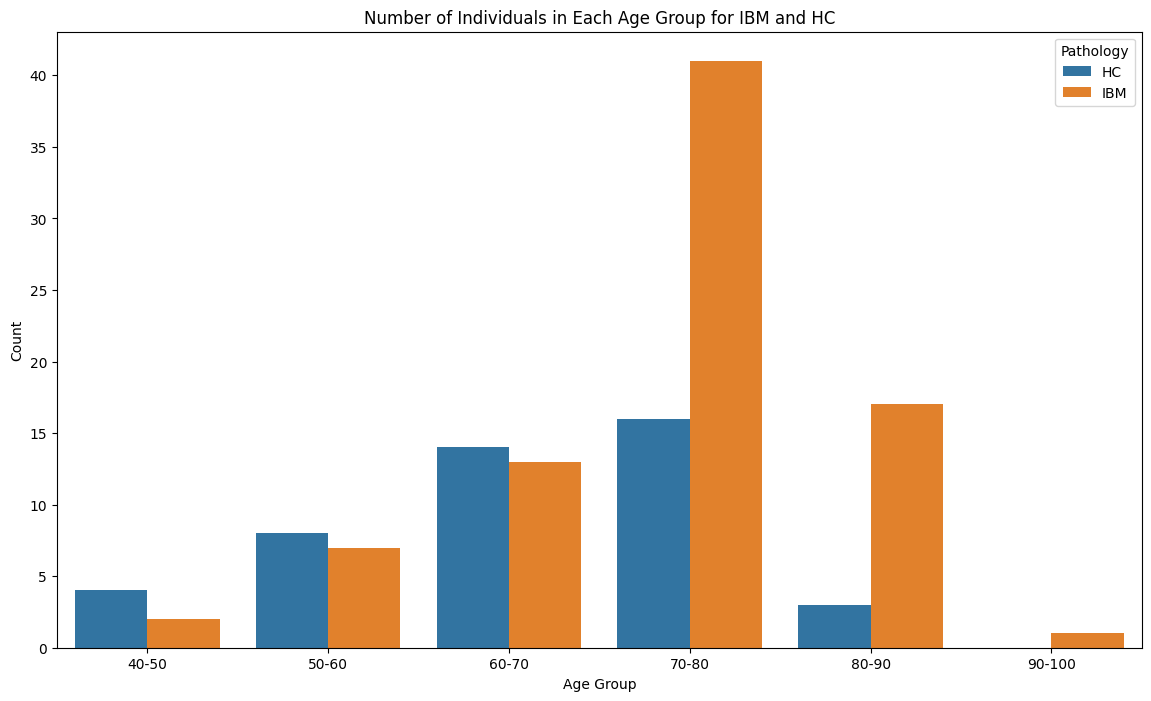

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your DataFrame, 'Pathology' is a column specifying the populations,
# and 'Age' is the column containing the age information.

# Define age groups
age_bins = [40, 50, 60, 70, 80, 90, 100]
age_labels = ['40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

# Create a new column for age groups on the fly
data['AgeGroup'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)

# Set up the plot
plt.figure(figsize=(14, 8))

# Create a countplot
sns.countplot(x='AgeGroup', hue='Pathology', data=data, dodge=True)

# Customize the plot
plt.title('Number of Individuals in Each Age Group for IBM and HC')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Pathology', loc='upper right')
plt.show()



In [ ]:
import pandas as pd
from scipy.stats import levene

def populations_passing_levene(data, parameters, group1, group2, alpha=0.05):
    not_passing_populations = []

    for parameter in parameters:
        # Levene's test for equality of variances
        stat, p_value_levene = levene(data[data['Pathology'] == group1][parameter],
                                      data[data['Pathology'] == group2][parameter])

        # Check if p-value is greater than alpha, meaning variances are equal
        if p_value_levene < alpha:
            not_passing_populations.append(parameter)

    return not_passing_populations

# Example usage
not_passing_populations = populations_passing_levene(data, parameters_to_compare, 'IBM', 'HC')

print("Populations passing Levene's test:")
not_passing_populations

In [ ]:
import pandas as pd
from scipy.stats import kruskal

# Assuming 'data' is your DataFrame
parameters_to_compare = [
    'Age', 'TCRγδ', 'Vδ2', 'Vγ9+Vδ2+', 'Vδ2+CD27-', 'Vδ2+Cx3Cr1+', 'Vδ2+CD57+',
    'Vδ1+', 'Vγ9+Vδ1+', 'Vδ1+CD27-', 'Vδ1+Cx3Cr1+', 'Vδ1+CD57+', 'Vδ1-Vδ2-', 'CD4+',
    'CD4Naive', 'CD4CM', 'CD4EM', 'CD4Temra', 'CD4+CD57+', 'CD4+KLRG1', 'CD4+CD27-',
    'CD4+CD28-', 'CD4+KI67+', 'CD4+Tbet+', 'CD4+IFNγ+', 'CD4+Perf+', 'CD4+IL17A+',
    'CD4+IFNγ+Perf+', 'CD8', 'CD8Naive', 'CD8CM', 'CD8EM', 'CD8Temra', 'CD8+CD57+','CD8+KLRG1+', 'CD8+CD27-',
    'CD8+CD28-', 'CD8+KI67+', 'CD8+Tbet+', 'CD8+IFNγ+', 'CD8+Perf+', 'CD8+IL17A+',
    'CD8+IFNγ+Perf+', 'Bcells', 'DN_Bcells', 'NaiveBcells', 'NonSM', 'SM', 'Treg',
    'TregFoxP3+', 'TregKI67+', 'NaiveTreg', 'MemTreg', 'ActTreg', 'Neutrophils', 'NKT',
    'pDC', 'monocytes', 'Nkcells', 'Basophils', 'cDC', 'CD56-16b', 'CD56b', 'CD56dim',
    'classical_monocytes', 'int_monocytes', 'inflam_monocytes'
]
# Create a dictionary to store the results
results_age_groups = {}

# Iterate through each parameter
for parameter in parameters_to_compare:
    # Create a sub-dictionary for each parameter
    results_age_groups[parameter] = {}

    # Iterate through each age group
    for age_group in age_labels:
        # Extract data for IBM and HC within the current age group
        ibm_data = data[(data['Pathology'] == 'IBM') & (data['AgeGroup'] == age_group)][parameter]
        hc_data = data[(data['Pathology'] == 'HC') & (data['AgeGroup'] == age_group)][parameter]

        # Perform Kruskal-Wallis test
        result_kw = kruskal(ibm_data, hc_data)

        # Store the result in the dictionary
        results_age_groups[parameter][age_group] = {'Kruskal-Wallis H-statistic': result_kw.statistic,
                                                     'P-value': result_kw.pvalue}

# Display the results
for parameter, age_group_results in results_age_groups.items():
    print(f"Results for {parameter}:")
    for age_group, result in age_group_results.items():
        print(f"  Age Group {age_group}:")
        print(f"    Kruskal-Wallis test - H-statistic: {result['Kruskal-Wallis H-statistic']}")
        print(f"    Kruskal-Wallis test - P-value: {result['P-value']}")
    print()